# Выявление перспективных компьютерных игр

**Цель исследования** - определение закономерностей на рынке компьютерных игр, влияющих на их успешность. Исследование построено на открытых исторических данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах (Xbox, PlayStation и другие) до 2016 года.

**Потребность в исследовании** обусловлена стремлением международного интернет-магазина "Стримчик", продающего компьютерные игры, спланировать рекламные кампании на 2017 год и найти потенциально популярный игровой продукт.

В работе проведён анализ закономерностей, определяющих успешность игр. 

**Результатом исследования** станут рекомендации, какой продукт в индустрии компьютерных игр наиболее перспективен для интернет-магазина "Стримчик".

##  Откроем файл. Изучим общую информацию

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from IPython import display

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

from pymystem3 import Mystem

from scipy import stats as st

#доп настройки
pd.options.display.expand_frame_repr = False
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Прочтём файл games.csv с информацией об играх и сохраним его в переменной games
try:
    games = pd.read_csv('/datasets/games.csv')
    
except:    
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')    

In [3]:
games.head()

Name Platform  Year_of_Release         Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating
0                Wii Sports      Wii           2006.0        Sports     41.36     28.96      3.77         8.45          76.0          8      E
1         Super Mario Bros.      NES           1985.0      Platform     29.08      3.58      6.81         0.77           NaN        NaN    NaN
2            Mario Kart Wii      Wii           2008.0        Racing     15.68     12.76      3.79         3.29          82.0        8.3      E
3         Wii Sports Resort      Wii           2009.0        Sports     15.61     10.93      3.28         2.95          80.0          8      E
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27      8.89     10.22         1.00           NaN        NaN    NaN

In [4]:
# Изучим общую информацию о датафрейме games
display.display(data=games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Данные представлены в виде таблицы из 16 715 строк и 11 столбцов. При этом, 6 столбцов числовых данных с плавающей точкой, 5 столбцов с объектами:

- Name — название игры;
- Platform — платформа;
- Year_of_Release — год выпуска;
- Genre — жанр игры;
- NA_sales — продажи в Северной Америке (миллионы долларов);
- EU_sales — продажи в Европе (миллионы долларов);
- JP_sales — продажи в Японии (миллионы долларов);
- Other_sales — продажи в других странах (миллионы долларов);
- Critic_Score — оценка критиков;
- User_Score — оценка пользователей;
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).


Отметим, что есть несоответствие типа данных в ряде столбцов (например, столбцы Year_of_Release и Critic_Score должны быть целочисленными, User_Score - числовым с плавающей точкой). Также следует привести названия столбцов в подходящий для анализа вид, к нижнему регистру. 

Кроме того, разное количество значений в столбцах указывает на пропуски в таблице. Пропуски могут быть связаны с отсутствием данных в открытых источниках, либо с отсутствием данных вообще (например, игра старая и во время ее выхода пользователи не могли ставить рейтинг), либо с техническими ошибками при формировании датасета.

Подробнее изучим столбцы в датасете.

**Название игры**

In [5]:
len(games['Name'].unique())

11560

У нас имеются данные по 11 560 играм.

**Платформа**

In [6]:
len(games['Platform'].unique())

31

In [7]:
games['Platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Игры вышли на 31 различной платформе, в том числе различных вариациях XBox, PlayStation, PersonalComputer, Wii и других.

**Год выпуска**

In [8]:
games['Year_of_Release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Игры, о которых имеется информация, вышли в период с 1980 по 2016 год.

**Жанр**

In [9]:
len(games['Genre'].unique())

13

In [10]:
games['Genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

Игры представлены в 12 жанрах: экшн, адвентура, файтинг, платформер, загадки, гонки, ролевые, шутер, симулятор, спорт, стратегия, разное. Для некоторых игр жанр не указан.

**Продажи**

In [11]:
games[['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']].describe()

NA_sales      EU_sales      JP_sales   Other_sales
count  16715.000000  16715.000000  16715.000000  16715.000000
mean       0.263377      0.145060      0.077617      0.047342
std        0.813604      0.503339      0.308853      0.186731
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50%        0.080000      0.020000      0.000000      0.010000
75%        0.240000      0.110000      0.040000      0.030000
max       41.360000     28.960000     10.220000     10.570000

Игры продавались в Северной Америке, Европе, Японии и других странах. При этом в Северной Америке продажи принесли от 0 (игра, скорее всего, не продавалась) до 41,36 миллионов долларов; в Европе - от 0 до 28,96 миллионов долларов; в Японии - от 0 до 10,22 миллионов долларов; в других странах - от 0 до 10,57 миллионов долларов. При этом для каждой из стран разброс очень велик (стандартное отклонение существенно): для Северной Америки он выше, для Европы - чуть меньше, для Японии - еще меньше, а для других стран - самый низкий.

**Оценка критиков и пользователей**

In [12]:
games[['Critic_Score']].describe()

Critic_Score
count   8137.000000
mean      68.967679
std       13.938165
min       13.000000
25%       60.000000
50%       71.000000
75%       79.000000
max       98.000000

Оценка критиков - от 13 до 98 баллов за игру со средним значением в 69 баллов, близким к медианному (71 балл). Это говорит о том, что игры в датасете представлены достаточно равномерно: от низко оцененных критиками до имеющих максимальной оценкой.

In [13]:
games['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Оценка пользователей от 0 до 9,7 баллов за игру; при этом оценки - не целые, а десятичные числа. Также есть пропущенные значения, и есть значения "tbd". Интересно, что они означают?

**Рейтинг от ESRB**

In [14]:
len(games['Rating'].sort_values().unique())

9

In [15]:
games['Rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Ассоциация ESRB определяет 8 вариантов возрастного рейтинга компьютерных игр:

- AO ("Adults Only 18+") — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;
- E ("Everyone") — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше, такие игры могут понравиться и взрослым;
- E10+ ("Everyone 10 and older") — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови;
- EC ("Early childhood") — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими;
- K-A ("Kids to Adult") — «От детей до взрослых»: Игры, содержание которых подходит любой аудитории;
- M («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
- T («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.
- RP («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Источник: Википедия - (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board).

Также в данных имеются игры, для которых значение рейтинга пропущено.

## Предобработка данных

### Переименование столбцов

При анализе информации об исходном датасете мы обратили внимание на то, что для дальнейшего анализа необходимо привести названия столбцов к нижнему регистру.

In [16]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Все названия столбцов приведены к нижнему регистру.

### Обработка пропусков и дубликатов, замена типа данных

**Замена типа данных**

Выше мы указали столбцы, которые требуют изменения типа данных. Перед преобразованием дадим некоторые пояснения. Нет необходимости в изменении типа данных столбцов с данными о продажах в целочисленные, поскольку они измеряются в миллионах долларов. Соответственно, значения после запятой - это тысячи долларов, которыми не хотелось бы пренебрегать при осуществлении анализа.

Необходимость в переводе оценок критиков и пользователей в целочисленные необходимо проверить. Потребность в изменении типов данных возникает в том случае, если система оценивания предполагает абсолютное целое значение; и отсутствует (оставляем значение с плавающей точкой), если оценки варьируются в небольшом интервале значений со значениями после запятой. Для того, чтобы это проверить, необходимо изучить уникальные значения в соответствующих столбцах.

In [17]:
# Уникальные значения оценок критиков
games['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

По встречающимся в столбце с оценкой критиков значениям, делаем вывод о том, что оценки имеют вид целочисленных значений от 0 до 100. Соответственно, требуется изменение типа данных в столбце.

In [18]:
# Уникальные значения оценок пользователей
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

По встречающимся в столбце с оценкой пользователей значениям, делаем вывод о том, что оценки имеют вид целочисленных значений от 0 до 10. Соответственно, изменение типа данных в столбце не требуется.

Также обратим внимание на встречающийся рейтинг tbd (to be determined). 

Это рейтинг, который будет определён позже, то есть на момент выгрузки данных его нет, и такое значение равносильно незаполненным значениям nan. Отличие в том, что для tbd нам известно, что пользователи выставляли рейтинг игре, просто он не был вычислен системой.

Нам необходимо заменить тип данных для столбцов:

- year_of_release: с < float > на < int >, поскольку число года - это целочисленное значение, а не число с плавающей точкой.
- critic_score: с < float > на < int >, поскольку оценка критиков варьируется от 0 до 100 в целочисленном формате.
- user_score: с < object > на < float >, так как оценка пользователей варьируется от 0 до 10 в числовом формате с плавающей точкой.

Но сначала нужно обработать все пропущенные значения.

### Обработка пропусков

In [19]:
#Проверим данные на наличие пропусков
games.isna().sum().sort_values(ascending = False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Пропуски отмечены в следующих столбцах:

- name (название игры);
- year_of_release (год выпуска);
- genre (жанр игры);
- critic_score (оценка критиков);
- user_score (оценка пользователей);
- rating (рейтинг от организации ESRB).

Также необходимо учесть значения tbd в данных с оценками пользователей. Выше мы пояснили, почему они равносильны пропускам.

Изучим пропуски каждого столбца подробнее и заполним их там, где это возможно.

In [20]:
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

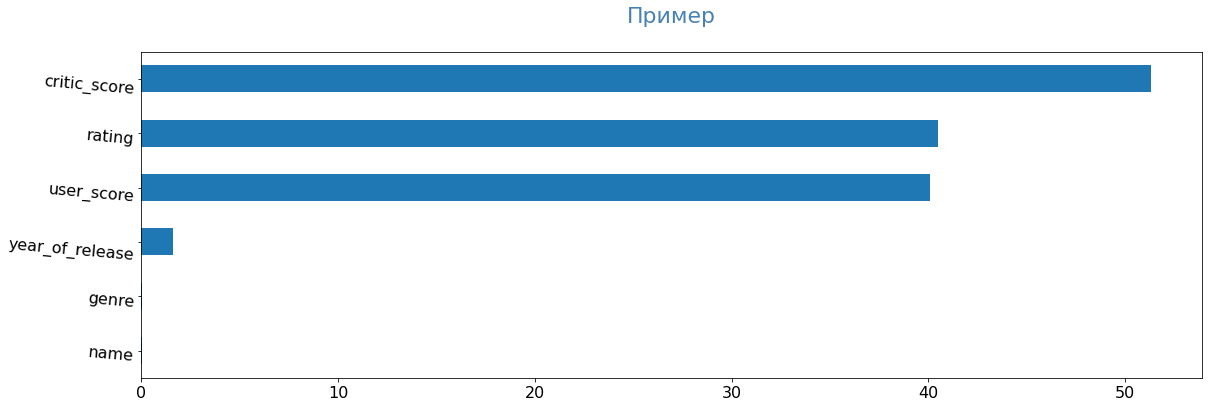

In [21]:
pass_value_barh(games)

**Название игры**

In [22]:
games.loc[games['name'].isna() == True]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00         0.08           NaN        NaN    NaN
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03         0.00           NaN        NaN    NaN

In [23]:
games['name'].isna().mean()

0.00011965300628178283

У нас имеется 2 игры, для которых нет названия. Обе игры вышли в 1993 году на платформе Sega Genesis. Одна из них была продана везде, кроме Японии, вторая - только в Японии. Возможно, это разные игры; но может быть, это одна игра. В любом случае, название этих игр мы восстановить не можем. Пропущенные значения составляют менее 1% от всех данных, поэтому мы можем их удалить. Кроме того, целью анализа является определение конкретных названий игр, являющихся перспективными, а название "Unknown" или вовсе отсутствие названия для нас неинформативно.

In [24]:
games.dropna(subset = ['name'], inplace = True)

**Год выпуска**

In [25]:
games.loc[games['year_of_release'].isna() == True].sample(10)

name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating
6293                     Disgaea 3: Absence of Detention      PSV              NaN  Role-Playing      0.11      0.05      0.07         0.03          78.0        7.6      T
6133         Unreal Championship 2: The Liandri Conflict       XB              NaN       Shooter      0.22      0.05      0.00         0.01          85.0        8.2      M
9706                                           Rocksmith       PC              NaN          Misc      0.06      0.04      0.00         0.01          78.0        8.1      T
6255   The Legend of Zelda: The Minish Cap(weekly JP ...      GBA              NaN        Action      0.00      0.00      0.27         0.01           NaN        NaN    NaN
4848                     Harvest Moon: Save the Homeland      PS2              NaN    Simulation      0.19      0.15      0.00         0.05          76.0        8.8      E
13564                               RollerCoaster Tycoon       PC              NaN      Strategy      0.02      0.02      0.00         0.01           NaN        NaN      E
1585                                              Combat     2600              NaN        Action      1.17      0.07      0.00         0.01           NaN        NaN    NaN
13647      The History Channel: Great Battles - Medieval      PS3              NaN      Strategy      0.00      0.03      0.00         0.01           NaN        NaN    NaN
10686                                     Happy Feet Two       DS              NaN        Action      0.08      0.01      0.00         0.01           NaN        tbd      E
15338                                       Mario Tennis      3DS              NaN        Sports      0.00      0.00      0.02         0.00           NaN        NaN    NaN

Мы видим, что по многим играм год релиза содержится в названии. Создадим список, в котором представлены все возможные годы выпуска игр. После чего в новом столбце через лемматизацию "вытащим" последние 4 символа из названия игр, так как год, как правило, мы видим в конце названия. Затем заполним пропуски года выпуска, исходя из полученных лемм, входящих в список с возможным годом выпуска.

Следует отметить, что возможны неточности при таком заполнении. К примеру, спортивные симуляторы могут иметь в названии год, следующий за годом выпуска. Либо игра могла выйти в декабре какого-то года, но в названии содержать число следующего года. Однако поскольку обработка каждого значения вручную через поисковые системы слишком трудозатратна, выбранный нами метод заполнения наиболее близок к искомому значению из возможных.

In [26]:
years = pd.Series(games.loc[games['year_of_release'].isna() != True, 'year_of_release']
         .astype('int').sort_values().unique(), name='years').astype('str')

In [27]:
m = Mystem()
name_lem = []
for i in games['name']:
    result = ''.join(m.lemmatize(i)).strip()[-4:]
    name_lem.append(result)
games['name_lem'] = name_lem

In [28]:
games.loc[(games['year_of_release'].isna()==True) & (games['name_lem'].isin(years) == True), 'year_of_release'] = (
games.loc[(games['year_of_release'].isna()==True) & (games['name_lem'].isin(years) == True), 'name_lem'])
games.drop('name_lem', axis='columns', inplace=True)

In [29]:
games['year_of_release'].isna().mean()

0.015197750254293065

Оставшиеся пропущенные значения составляют около 1,5% от всех данных, поэтому мы можем их удалить. После чего можем изменить тип данных в столбце на int.

In [30]:
games.drop(games.loc[(games['year_of_release'].isnull())].index, inplace=True)
games['year_of_release'] = games['year_of_release'].astype('int')

**Жанр игры**

In [31]:
games['genre'].isna().mean()

0.0

После предыдущих шагов по обработке пропусков, в столбце с жанром игры пропусков не осталось.

**Оценка критиков и оценка пользователей**

Перед пропусками по оценкам, необходимо обработать значения tbd. По сути, этот показатель равноценен пропущенным значениям. Это рейтинг, которого нет на момент выгрузки данных. Соответственно, мы можем заменить его на пропущенное значение.

In [32]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float')

Проанализируем пропуски в столбцах с оценками игр

In [33]:
games['critic_score'].isna().mean()

0.514308281183547

In [34]:
games['user_score'].isna().mean()

0.5460234522145938

У нас имеется около 51% с пропущенными значениями оценки критиков и около 55% - оценки пользователей. Это значительные величины. Мы не можем удалить строки, так как потеряем большой объём данных. Но и восстановить данные мы не можем, так как оценка  имеет множество параметров, по которым ранжируется балл игры. 

Параметры мы не знаем. Восстанавливать значения по метрикам (даже в рамках группировок по годам и жанрам) тоже будет неверно: 2 разные игры, вышедшие в один год на одну платформу и в одном жанре, могут быть оценены по-разному.

Попробуем понять причины такого большого количества пропусков. Рассмотрим количество пропусков по годам.

In [35]:
critscore_nan_year = (games
                          .loc[games['critic_score'].isna()==True]
                          .pivot_table(index='year_of_release', values='name', aggfunc='count')
                          .reset_index()
                     )
userscore_nan_year = (games
                          .loc[games['user_score'].isna()==True]
                          .pivot_table(index='year_of_release', values='name', aggfunc='count')
                          .reset_index()
                     )

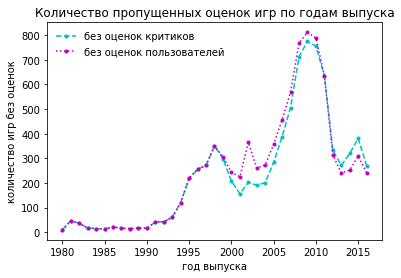

In [36]:
fig, ax = plt.subplots()
ax.set(title='Количество пропущенных оценок игр по годам выпуска',
       xlabel='год выпуска', ylabel='количество игр без оценок')
ax.plot(critscore_nan_year['year_of_release'], critscore_nan_year['name'], '.--c', label='без оценок критиков')
ax.plot(userscore_nan_year['year_of_release'], userscore_nan_year['name'], '.:m', label='без оценок пользователей')
ax.grid=True
ax.legend(frameon=False)
plt.show()

In [37]:
# Количество игр, у которых отсутствует оценка критиков, но есть оценка пользователей
len(games.loc[(games['critic_score'].isna()==True) & (games['user_score'].isna()!=True)])

569

In [38]:
# Количество игр, у которых отсутствует оценка пользователей, но есть оценка критиков
len(games.loc[(games['user_score'].isna()==True) & (games['critic_score'].isna()!=True)])

1091

In [39]:
# Количество игр, у которых отсутствует и оценка критиков, и оценка пользователей
len(games.loc[(games['critic_score'].isna()==True) & (games['user_score'].isna()==True)])

7896

**Рейтинг от организации ESRB**

In [40]:
games['rating'].isna().mean()

0.4059177349778237

У нас около 41% с пропущенными значениями рейтинга. Это значительная величина. Мы не можем удалить строки, так как потеряем большой объём данных. Но и восстановить данные мы не можем, так как не знаем, по каким критериям выставлялся рейтинг.

Попытаемся понять причины такого большого количества пропусков. Рассмотрим количество пропусков по годам.

In [41]:
rating_nan_year = (games
                        .loc[games['rating'].isna()==True]
                        .pivot_table(index='year_of_release', values='name', aggfunc='count')
                        .reset_index()
                     )

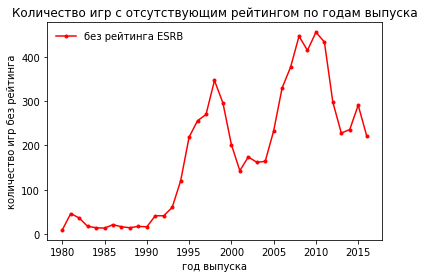

In [42]:
fig, ax = plt.subplots()
ax.set(title='Количество игр с отсутствующим рейтингом по годам выпуска',
       xlabel='год выпуска', ylabel='количество игр без рейтинга')
ax.plot(rating_nan_year['year_of_release'], rating_nan_year['name'], '.-r', label='без рейтинга ESRB')
ax.grid=True
ax.legend(frameon=False)
plt.show()

Наблюдаем ту же динамику количества игр без рейтинга, что и количества игр без оценок. Соответственно, причины пропусков в данных могут быть теми же.

Проверим, заполнены ли пропуски.

In [43]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8465
user_score         8987
rating             6681
dtype: int64

In [44]:
#Заменим пропущенные значения на "undefiend"
games["rating"] = games['rating'].fillna("Nan")

In [45]:
games.isna().sum().sort_values(ascending = False)

user_score         8987
critic_score       8465
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
dtype: int64

### Обработка дубликатов

In [46]:
# Установим наличие дубликатов в данных
games.duplicated().sum()

0

In [47]:
key = ['name', 'platform', 'year_of_release']

games.fillna(-999).groupby(key)['name'].count().sort_values(ascending=False).head(20)

name                        platform  year_of_release
Madden NFL 13               PS3       2012               2
 Beyblade Burst             3DS       2016               1
Ratatouille                 GC        2007               1
Rapala Tournament Fishing!  Wii       2006               1
                            X360      2006               1
Rapala Trophies             PSP       2006               1
Rapala for Kinect           X360      2011               1
Rapala's Fishing Frenzy     Wii       2008               1
Rapala: We Fish             Wii       2009               1
Rapid Reload                PS        1995               1
Rare Replay                 XOne      2015               1
Rascal                      PS        1998               1
Rat Attack!                 N64       2000               1
                            PS        1999               1
Ratatouille                 DS        2007               1
                            GBA       2007               1
  

In [48]:
key = ['name', 'platform', 'year_of_release']
games = games.drop_duplicates(subset=key)

### Расчёт суммарных продаж

Для расчёта суммарных продаж во всех регионах по играм, создадим отдельный столбец total_sales, в котором просуммируем столбцы na_sales, eu_sales, jp_sales, other_sales.

In [49]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  total_sales
0                Wii Sports      Wii             2006        Sports     41.36     28.96      3.77         8.45          76.0         8.0      E        82.54
1         Super Mario Bros.      NES             1985      Platform     29.08      3.58      6.81         0.77           NaN         NaN    Nan        40.24
2            Mario Kart Wii      Wii             2008        Racing     15.68     12.76      3.79         3.29          82.0         8.3      E        35.52
3         Wii Sports Resort      Wii             2009        Sports     15.61     10.93      3.28         2.95          80.0         8.0      E        32.77
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27      8.89     10.22         1.00           NaN         NaN    Nan        31.38

**Вывод**

На этапе подготовки данных все названия столбцов были приведены к нижнему регистру; была проведена замена типа данных там, где это возможно и необходимо; были обработаны пропуски; суммарные продажи во всех регионах по играм были сведены в отдельный столбец.

Во время обработки пропусков была обнаружена интересная тенденция: количество игр, для которых нет оценки критиков по годам выпуска практически соответствовало количеству игр, для которых нет оценки пользователей, и количеству игр, для которых нет рейтинга от организации ESRB. Характерная динамика показателей может быть связана с тем, что игр стало выходить больше - соответственно, пользователи "распылились" между играми, не имея возможности оценить все из них. Также возникло большее количество платформ - часть пользователей, имеющая возможность поиграть на одной из платформ, не может позволить себе другие платформы. А некоторые из игр являются неэксклюзивными только для одной платформы, а встречаются на всех платформах, соответственно, могут быть неоценены пользователями, критиками и ESRB.

Также часть пропусков за последние годы связана с показателем tbd (to be determined): игра была оценена, но система не посчитала рейтинг на момент выгрузки данных (рейтинг по оценке пользователей будет представлен позже). Что касается пропусков в оценках критиков и рейтинге ESRB, возможно, часть игр также не была сведена в оценку и рейтинг на момент выгрузки (оценка и рейтинг появятся немного позже). Кроме того, критики и ESRB, вероятно, оценивают и выставляют рейтинг не каждой вышедшей игру, а наиболее ожидаемые и пользующиеся спросом игры, либо игре в целом - только на одной из платформ. Также возможно, что данные по оценкам и рейтингу отсутствуют в открытом доступе.

In [50]:
# check
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16458 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16458 non-null  object 
 1   platform         16458 non-null  object 
 2   year_of_release  16458 non-null  int64  
 3   genre            16458 non-null  object 
 4   na_sales         16458 non-null  float64
 5   eu_sales         16458 non-null  float64
 6   jp_sales         16458 non-null  float64
 7   other_sales      16458 non-null  float64
 8   critic_score     7993 non-null   float64
 9   user_score       7471 non-null   float64
 10  rating           16458 non-null  object 
 11  total_sales      16458 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


## Исследовательский анализ данных

### Количество выходящих игр по годам

In [51]:
games_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

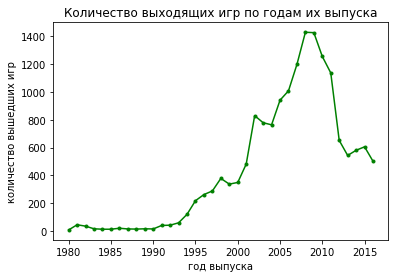

In [52]:
fig, ax = plt.subplots()
ax.set(title='Количество выходящих игр по годам их выпуска',
       xlabel='год выпуска', ylabel='количество вышедших игр')
ax.plot(games_year['year_of_release'], games_year['name'], '.-g')
ax.grid=True
plt.show()

Заметим, что в данных мало игр, выпущенных с 1980 по 1990 годы. С 1990 по 2000 представлено больше игр. Основной объём информации приходится на игры, вышедшие с 2000 по 2016 годы.

Таким образом, у нас имеется хвост данных, который следует отбросить - это период до 1994 года: данные за этот период непоказательны.

### Продажи по платформам

Найдём TOP-5 платформ с наибольшими суммарными продажами

In [53]:
platform_popular = (games
                        .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                        .reset_index()
                        .sort_values(by='total_sales', ascending=False)
                        .head(6)
                        .reset_index(drop=True)
                   )
platform_popular

platform  total_sales
0      PS2      1247.28
1     X360       961.30
2      PS3       931.33
3      Wii       891.18
4       DS       802.79
5       PS       727.58

In [54]:
# Создадим список с названием платформ из TOP-5
platforms = platform_popular['platform']

Построим и изучим распределение суммарных продаж по годам для каждой из TOP-5 платформ

In [55]:
platform_year = (games
                      .loc[games['platform'].isin(platforms)]
                      .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                      .reset_index()
                 )

In [56]:
# поиск игры 1985 года
games.query('platform == "DS" and year_of_release == 1985')

name platform  year_of_release   genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  total_sales
15957  Strongest Tokyo University Shogi DS       DS             1985  Action       0.0       0.0      0.02          0.0           NaN         NaN    Nan         0.02

In [57]:
# фильтрация игр с 1994 года
platform_year =platform_year.query('year_of_release >=1994')

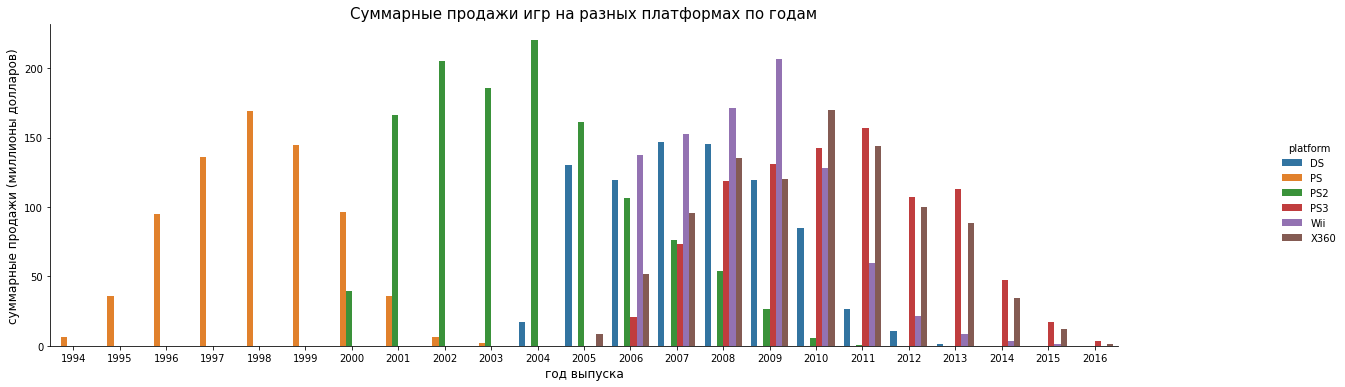

In [58]:
plot = sns.catplot("year_of_release", "total_sales", hue="platform", kind="bar", data=platform_year)
plt.title("Суммарные продажи игр на разных платформах по годам", fontsize=15)
plt.xlabel('год выпуска', fontsize=12)
plt.ylabel('суммарные продажи (миллионы долларов)', fontsize=12)
plot.fig.set_size_inches(20,5)
plt.show()

В разные годы были популярны (и приносили доход) игры на разных платформах. Игры на Playstation набирали популярность с 1994 года, достигли пика по продажам в 1990 году и сошли на нет в 2002-2003 годах. 

На замену таким играм в 2000 году пришли игры на Playstation2, достаточно долго (с 2001 по 2005 гг.) лидируя на рынке игр по продажам. Затем пришли игры на карманных консолях DS, которые с 2004 года набрали быстро популярность в 2005-2010 гг. Практически в то же время (с 2006 по 2010 гг. с пиком в 2009 г.) были популярны игры на платформе Wii (с самой малоразмерной на тот момент приставкой Nintendo Wii). В те же годы на смену Playstation2 пришли игры на платформе Playstation3, которые продавались максимально хорошо в 2008-2013 гг. Вместе с Playstation3 в те же годы были популярны игры на Xbox360.

Из всех этих платформ самой продаваемой по сумме продаж стала Playstation2. На тот момент у неё не было конкурентоспособных аналогов, она в течение долгого времени занимала топовые позиции. Второе и третье места делят между собой Xbox360, Playstation3, DS и Wii: игры на этих платформах были популярны в одни и те же годы, и предпочтения потребителей игр разделились между ними. Отдельно отметим Playstation - игры на этой платформе выходили в ранние годы, и на тот момент не наблюдалось конкурентоспособных аналогов.

Примерный срок, за который устаревает платформа, 8-10 лет. Также следует отметить, что со временем стало появляться больше конкурентоспособных платформ, способных занять нишу и привлечь свою категорию потребителей.

Исходя из анализа количества выпущенных игр по годам и анализа продаж по платформам, продажа игр на которых приносит наибольший доход, можем сделать вывод о том, что период до 1994 года не является актуальным для анализа. 

До 1994 года выходило слишком мало игр, относительно общей выборки; а также не наблюдалось лидирующих по суммарным продажам платформ. Более того, только за последние 10 лет мы наблюдаем и большое количество игр, и большой выбор платформ, которые могут составить друг-другу конкуренцию. Поскольку последние тенденции показывают лидерство нескольких платформ, а не одной; а также срок устаревания платформы составляет около 10 лет; и данные за 2016 год неполные, нам нужен срез данных с 2006 по 2015 год, с которым мы продолжим работать.

In [59]:
games_actual = games.query('year_of_release >= 2006 & year_of_release <= 2015')

Нам нужны платформы, которые находятся на подъеме, а значит стоит рассмотреть период равный примерно половине жизненного цикла. Иначе нам будут мешать платформы, которые имели большие продажи в прошлые годы, но уже на спаде и скоро перестанут выпускаться. 

Для определения такого периода изучим данные глубже.

### Продажи по платформам в актуальный период

Составим сводную таблицу с динамикой лидерства платформ по продажам

In [60]:
platform_dynam = games_actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
platform_dynam

year_of_release    2006    2007    2008    2009    2010    2011    2012    2013    2014    2015
platform                                                                                       
3DS                 NaN     NaN     NaN     NaN     NaN   63.20   51.36   56.57   43.76   27.78
DC                  NaN    0.02    0.04     NaN     NaN     NaN     NaN     NaN     NaN     NaN
DS               119.81  146.94  145.32  119.54   85.02   26.18   11.01    1.54     NaN     NaN
GBA                5.28    3.40     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
GC                11.26    0.27     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
PC                 2.85    9.28   12.42   16.91   24.28   35.03   23.22   12.38   13.28    8.52
PS2              106.46   75.99   53.90   26.40    5.64    0.45     NaN     NaN     NaN     NaN
PS3               20.96   73.19  118.52  130.93  142.17  156.78  107.35  113.25   47.76   16.82
PS4                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   25.99  100.00  118.90
PSP               55.32   46.93   34.56   37.78   35.04   17.82    7.69    3.14    0.24    0.12
PSV                 NaN     NaN     NaN     NaN     NaN    4.63   16.19   10.59   11.90    6.25
Wii              137.15  152.77  171.32  206.97  127.95   59.65   21.71    8.59    3.75    1.14
WiiU                NaN     NaN     NaN     NaN     NaN     NaN   17.56   21.65   22.03   16.35
X360              51.62   95.42  135.26  120.29  170.03  143.89   99.74   88.58   34.74   11.96
XB                10.04    0.55    0.18     NaN     NaN     NaN     NaN     NaN     NaN     NaN
XOne                NaN     NaN     NaN     NaN     NaN     NaN     NaN   18.96   54.07   60.14

Удалим из анализа устаревшие платформы (для которых нет данных в 2015 году) и платформы, устареющие в 2017 году (есть данные ранее 2010 года).

In [61]:
platform_dynam = platform_dynam.loc[platform_dynam[2006].isna()==True].copy()
platform_dynam.dropna(subset = [2015], inplace = True)
platform_dynam

year_of_release  2006  2007  2008  2009  2010   2011   2012   2013    2014    2015
platform                                                                          
3DS               NaN   NaN   NaN   NaN   NaN  63.20  51.36  56.57   43.76   27.78
PS4               NaN   NaN   NaN   NaN   NaN    NaN    NaN  25.99  100.00  118.90
PSV               NaN   NaN   NaN   NaN   NaN   4.63  16.19  10.59   11.90    6.25
WiiU              NaN   NaN   NaN   NaN   NaN    NaN  17.56  21.65   22.03   16.35
XOne              NaN   NaN   NaN   NaN   NaN    NaN    NaN  18.96   54.07   60.14

Мы получили срез 5 платформ, которые будут актуальны в 2017 году. Удалим пустые столбцы и построим график для этих платформ.

In [62]:
platform_dynam.drop([2006, 2007, 2008, 2009, 2010], axis='columns', inplace=True)
platform_dynam

year_of_release   2011   2012   2013    2014    2015
platform                                            
3DS              63.20  51.36  56.57   43.76   27.78
PS4                NaN    NaN  25.99  100.00  118.90
PSV               4.63  16.19  10.59   11.90    6.25
WiiU               NaN  17.56  21.65   22.03   16.35
XOne               NaN    NaN  18.96   54.07   60.14

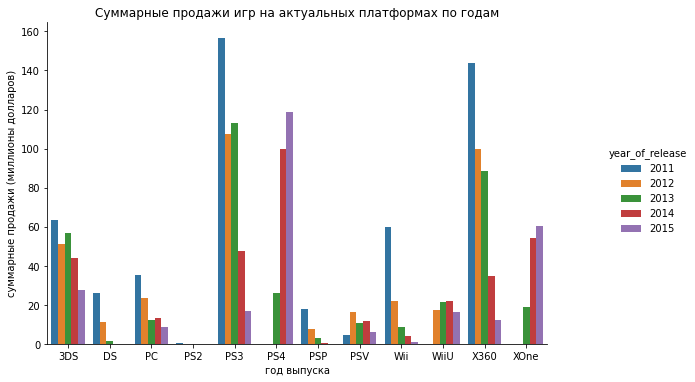

In [63]:
platform_dynam = (games_actual
                              .loc[(games_actual['platform'].isin(('2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'))==True) & (
                                  games_actual['year_of_release'].isin((2011, 2012, 2013, 2014, 2015))==True)]
                              .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                              .reset_index()
                 )

plot = sns.catplot(x='platform', y='total_sales', hue="year_of_release", kind="bar", data=platform_dynam)
plt.title("Суммарные продажи игр на актуальных платформах по годам", fontsize=12)
plt.xlabel('год выпуска', fontsize=10)
plt.ylabel('суммарные продажи (миллионы долларов)', fontsize=10)
plot.fig.set_size_inches(10,5)

Таким образом, мы получили потенциально прибыльные в 2017 году платформы: 

- 3DS, которая уже несколько лет пользуется популярностью у потребителей игр; 
- Playstation4, только набирающая обороты и приносящая самый высокий доход от продаж; 
- PlaystationVita, не настолько популярная (что может быть связано с меньшим количеством игр на данной платформе), но также потенциально прибыльная в ближайшие 2-3 года; 
- WiiU, являющаяся преемником Wii, которая тоже была достаточно популярна в своё время; 
- XBoxOne от компании Microsoft, способная составить конкуренцию Playstation4.

При этом наблюдается рост популярности игр для Playstation4 и XBoxOne. Снижение спроса игр на платформах 3DS, PlaystationVita и WiiU. Тем не менее, даже они потенциально могут принести достаточно высокий доход до появления аналогов нового поколения.

### Построим боксплот по наиболее перспективным платформам

Мы выделили наиболее перспективные платформы, которые будем далее анализировать. Оставим в срезе данных только игры, относящиеся к этим платформам

In [64]:
profitable_platforms = pd.Series(platform_dynam['platform'].unique())
games_popular = games_actual.loc[games_actual['platform'].isin(profitable_platforms)==True].reset_index(drop=True)
games_popular.head()

name platform  year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  total_sales
0             Wii Sports      Wii             2006    Sports     41.36     28.96      3.77         8.45          76.0         8.0      E        82.54
1         Mario Kart Wii      Wii             2008    Racing     15.68     12.76      3.79         3.29          82.0         8.3      E        35.52
2      Wii Sports Resort      Wii             2009    Sports     15.61     10.93      3.28         2.95          80.0         8.0      E        32.77
3  New Super Mario Bros.       DS             2006  Platform     11.28      9.14      6.50         2.88          89.0         8.5      E        29.80
4               Wii Play      Wii             2006      Misc     13.96      9.18      2.93         2.84          58.0         6.6      E        28.91

In [65]:
# Создадим таблицу, необходимую для построения боксплотов, исключив ненужные столбцы
name_sale = games_popular.pivot_table(index=['platform', 'name'], values='total_sales', aggfunc='sum').reset_index()
name_sale.head()

platform                      name  total_sales
0      3DS         Fire Emblem Fates         1.67
1      3DS      Frozen: Olaf's Quest         0.59
2      3DS  12-Sai. Honto no Kimochi         0.07
3      3DS          50 Classic Games         0.01
4      3DS  7th Dragon III Code: VFD         0.16

Построим боксплоты по глобальным продажам каждой игры и разбивкой по платформам

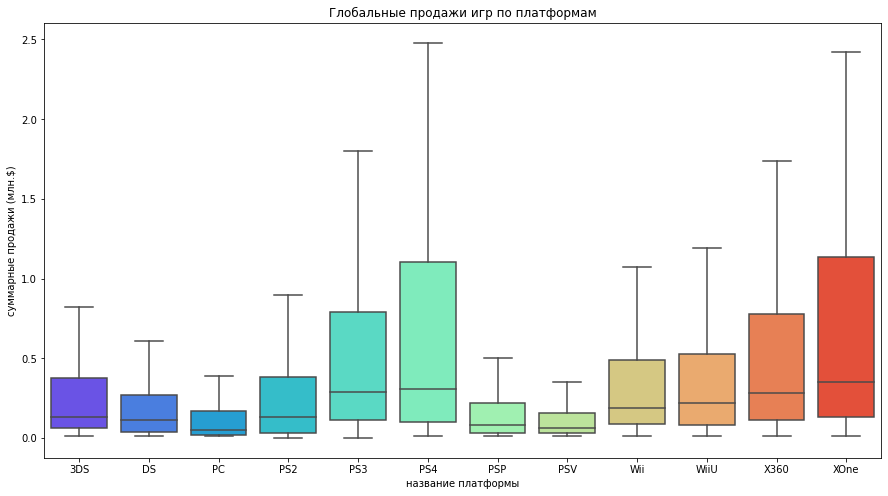

In [66]:
fig = plt.subplots(figsize=(15,8))
plt.title("Глобальные продажи игр по платформам")
plot = sns.boxplot(x="platform", y="total_sales", data=name_sale, palette='rainbow', showfliers=False)
plt.xlabel('название платформы')
plt.ylabel('суммарные продажи (млн.$)')
plt.show()

Видим, что на каждой из платформ большое количество игр, суммарные продажи по которым выбиваются из квартильных значений. 

Разница суммарных продаж игр в рамках каждой платформы велика для Playstation3, Playstation4 и  XBoxOne; чуть меньше - для WiiU и X360; и относительно небольшая - для 3DS и PlaystationVita.

По наиболее перспективным платформам наблюдается превышение среднего значения над медианным и уклон датасетов вправо: для  Playstation3, Playstation4 и XBoxOne наиболее сильно, для WiiU и X360 - чуть меньше, и для 3DS и PlaystationVita - относительно небольшой. 

Также видим различия в медианных значениях: игры yf Playstation4 и XBoxOne имеют схожие боксплоты (квартильные, средние и медианные значения), а WiiU характеризуется меньшим значением; затем идёт X360 и PS3.

Это может быть связано с разнобразием игр: поскольку платформы Playstation и XBox достаточно давно приобрели популярность среди потребителей, они могут позволить себе выпуск ранжированного по цене игрового контента, способного найти своего потребителя. Поэтому их боксплоты шире и растянутее. 

Wii тоже достаточно старая - в версиях предыдущих поколений, но менее популярная. Соответственно, разнообразие игр на данной платформе может быть ниже. 

Что касается X360 и PS3 - это здесь небольшое разнообразие игр, которые, как мы видим по боксплоту, схожи в ценовой категории и по продажам. Разброс по данной платформе самый небольшой, и среднее значение не сильно выше медианного.

### Связь отзывов и продаж

Чтобы изучить влияние отзывов пользователей и критиков на продажи, возьмём самые популярные платформы по сумме продаж за последние годы, которые мы выделили ранее: 3DS, Playstation4, PlaystationVita, WiiU и XBoxOne.

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

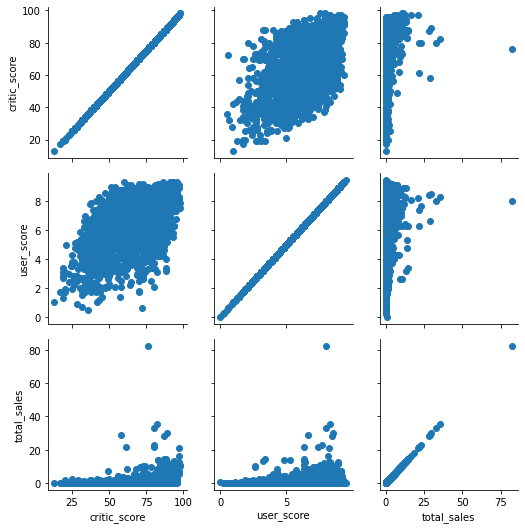

In [67]:
Scaterplots = sns.PairGrid(games_popular[['critic_score', 'user_score', 'total_sales']])
Scaterplots.map(plt.scatter)
plt.show()

In [68]:
Correlation = games_popular.corr()
Correlation

year_of_release  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  total_sales
year_of_release         1.000000 -0.021139  0.035562  0.013212    -0.008104      0.140001   -0.117305     0.003160
na_sales               -0.021139  1.000000  0.867996  0.428873     0.826770      0.226928    0.074198     0.960303
eu_sales                0.035562  0.867996  1.000000  0.452605     0.877317      0.233043    0.061696     0.951176
jp_sales                0.013212  0.428873  0.452605  1.000000     0.393197      0.143053    0.134474     0.571938
other_sales            -0.008104  0.826770  0.877317  0.393197     1.000000      0.249898    0.082893     0.893026
critic_score            0.140001  0.226928  0.233043  0.143053     0.249898      1.000000    0.582650     0.241694
user_score             -0.117305  0.074198  0.061696  0.134474     0.082893      0.582650    1.000000     0.085140
total_sales             0.003160  0.960303  0.951176  0.571938     0.893026      0.241694    0.085140     1.000000

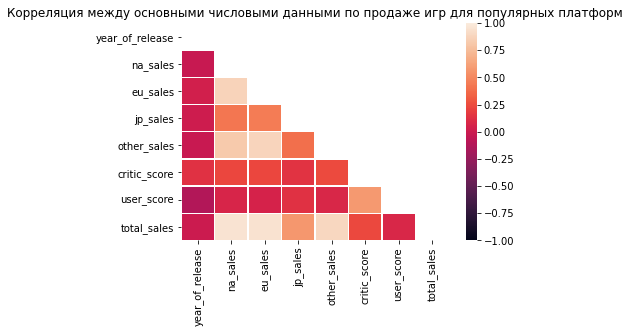

In [69]:
fig, ax = plt.subplots()
plt.title("Корреляция между основными числовыми данными по продаже игр для популярных платформ")
mask = np.triu(np.ones_like(Correlation, dtype=np.bool))
sns.heatmap(Correlation, vmin=-1, vmax=1, linewidths=.3, mask=mask, ax=ax)
plt.show()

Коэффициент корреляции между Оценкой критиков и Совокупными продажами составил 0,37, по региональным продажам этот коэффициент примерно схож и близок к 0,32-0,37; кроме Японии - 0,18. Что говорит о небольшой зависимости между этими показателями. 

Этот же вывод мы можем сделать из диаграммы рассеяния - игры с низкими оценками критиков практически не продаются, в то время как игры с высокими оценками имеют больше продаж. С одной стороны, это может быть связано с тем, что люди обращают внимание на оценку игры, прежде чем покупают её (но корреляция невысокая, и это не ключевой показатель). С другой стороны, возможно, критиками оцениваются не все игры, а наиболее популярные у покупателей (или потенциально популярные - по рейтингу ожидания).

Коэффициент корреляции между Оценкой покупателей и Совокупными продажами составил 0,09, что говорит об отсутствии зависимости между этими показателями. 

При этом диаграмма рассения схожа с диаграммой рассеяния по оценкам критиков, но имеет больший разброс при низких оценках. Возможно, потребитель покупает игру и поиграв, ставит ей оценку, исходя из субъективного впечатления. Таким образом, одна и та же игра может оставить как хорошее, так и плохое впечатление - в зависимости от индивидуальных предпочтений. 

Интересно заметить, что в Японии ситуация иная: корреляция между отзывами потребителей и продажами - 21%. Возможно, потребители в этом регионе более ответственно относятся к покупкам, либо имеют схожий вкус, либо не имеют высоких ожиданий при покупке игры, либо больше доверяют пользователям, чем критикам. А может быть, это связано с ценовой политикой игр, продающихся в Японии, по соотношению "цена-качество".

Тем не менее, связь оценок с сумммами продаж не сильна. Соответственно, на продажи игр влияют иные факторы.

### Другие платформы

Сравним результаты с продажами игр на других платформах

In [70]:
games_others = games_actual.loc[games_actual['platform'].isin(profitable_platforms)!=True].reset_index(drop=True)

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

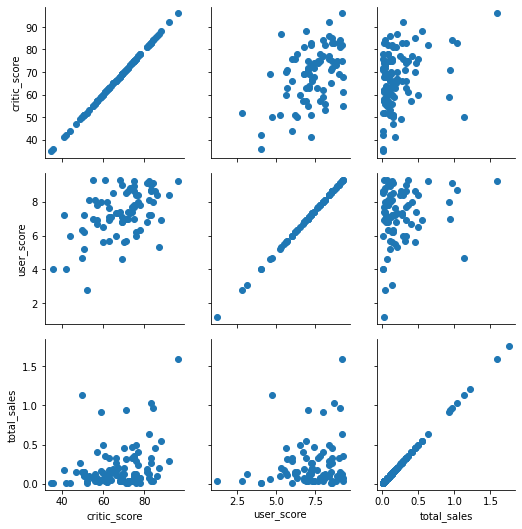

In [71]:
Scaterplots = sns.PairGrid(games_others[['critic_score', 'user_score', 'total_sales']])
Scaterplots.map(plt.scatter)
plt.show()

In [72]:
Correlation = games_others.corr()
Correlation

year_of_release  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  total_sales
year_of_release         1.000000  0.070163  0.103101 -0.037049     0.008601      0.061107   -0.120575     0.072132
na_sales                0.070163  1.000000  0.869443 -0.114969     0.831008      0.263141    0.179594     0.974270
eu_sales                0.103101  0.869443  1.000000 -0.103328     0.813449      0.221008    0.107147     0.910088
jp_sales               -0.037049 -0.114969 -0.103328  1.000000     0.092747      0.258603    0.086205     0.071122
other_sales             0.008601  0.831008  0.813449  0.092747     1.000000      0.350444    0.237315     0.875627
critic_score            0.061107  0.263141  0.221008  0.258603     0.350444      1.000000    0.488515     0.297868
user_score             -0.120575  0.179594  0.107147  0.086205     0.237315      0.488515    1.000000     0.182379
total_sales             0.072132  0.974270  0.910088  0.071122     0.875627      0.297868    0.182379     1.000000

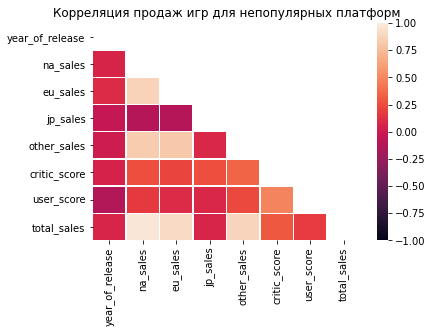

In [73]:
fig, ax = plt.subplots()
plt.title("Корреляция продаж игр для непопулярных платформ")
mask = np.triu(np.ones_like(Correlation, dtype=np.bool))
sns.heatmap(Correlation, vmin=-1, vmax=1, linewidths=.3, mask=mask, ax=ax)
plt.show()

Коэффициент корреляции между Оценкой критиков и Совокупными продажами для непопулярных платформ составил 0,23. По региональным продажам этот коэффициент примерно схож и близок к 0,23. А в Японии - 13%, что говорит об еще меньшей зависимости между этими показателями, чем для популярных платформ. 

Диаграмма рассеяния также имеет больший разброс значений при средних и низких оценках. Соответственно, для игр на непопулярных платформах отзывы критиков менее важны покупателям, чем на популярной платформе. Возможно, это связано и с ценовой политикой. Люди, тратящие большие деньги на игры, более критичны к выбору.

Коэффициент корреляции между Оценкой покупателей и Совокупными продажами составил 0,08, что идентично показателю на популярных платформах. Значит, на продажи игр влияют иные факторы.

Диаграмма рассеяния для PS4


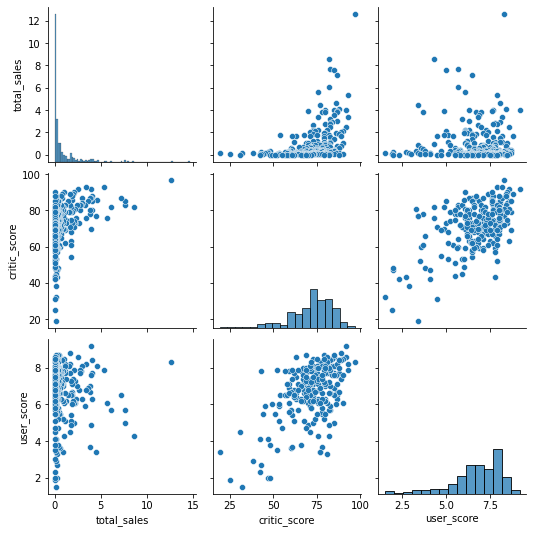

In [74]:
print("Диаграмма рассеяния для PS4")
sns.pairplot(games[games.platform == "PS4"][['total_sales', 'critic_score', 'user_score']])
plt.show()

In [75]:
print("Матрица корреляций")
games[games.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций


total_sales  critic_score  user_score
total_sales      1.000000      0.406568   -0.031957
critic_score     0.406568      1.000000    0.557654
user_score      -0.031957      0.557654    1.000000

Корреляция между total_sales и critic_score равна 0.4, что ожидаемо, мы видим эту зависимость на графике. Корреляции между total_sales и user_score нет.

Диаграмма рассеяния для XOne


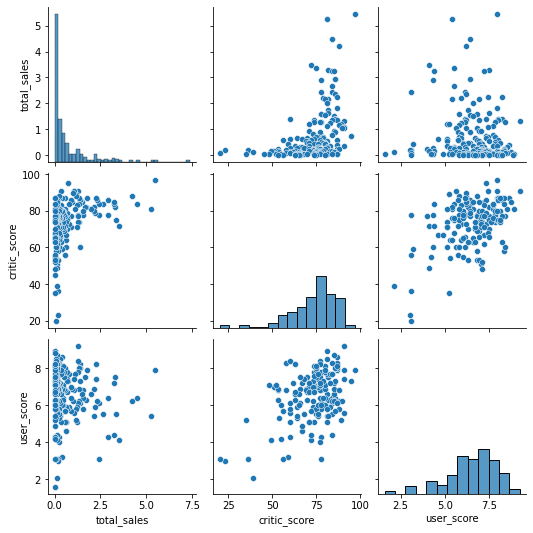

In [76]:
print("Диаграмма рассеяния для XOne")
sns.pairplot(games[games.platform == "XOne"][['total_sales', 'critic_score', 'user_score']])
plt.show()

In [77]:
print("Матрица корреляций")
games[games.platform == "XOne"][['total_sales', 'critic_score', 'user_score']].corr()

Матрица корреляций


total_sales  critic_score  user_score
total_sales      1.000000      0.416998   -0.068925
critic_score     0.416998      1.000000    0.472462
user_score      -0.068925      0.472462    1.000000

Аналогично, корреляция между total_sales и critic_score ~ 0.4. Корреляции между total_sales и user_score нет.

### Распределение игр по жанрам

Построим боксплоты по глобальным продажам каждой игры и разбивкой по жанрам

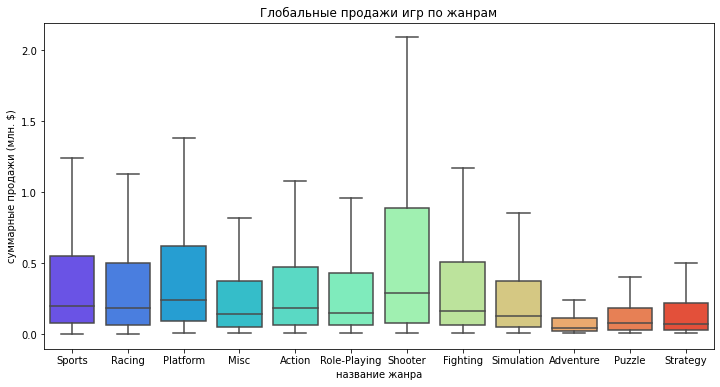

In [78]:
fig = plt.subplots(figsize=(12,6))
plt.title("Глобальные продажи игр по жанрам")
plot = sns.boxplot(x="genre", y="total_sales", data=games_actual, palette='rainbow', showfliers=False)
plt.xlabel('название жанра')
plt.ylabel('суммарные продажи (млн. $)')
plt.show()

Для выделения самых прибыльных и жанров с низкими продажами, выведем таблицу значений по жанрам

In [79]:
(games_actual
             .pivot_table(index='genre', values='total_sales', aggfunc='sum')
             .sort_values(by='total_sales', ascending=False)
             .reset_index()
)

genre  total_sales
0         Action      1086.54
1         Sports       770.38
2        Shooter       678.82
3           Misc       552.26
4   Role-Playing       504.22
5         Racing       296.30
6       Platform       276.51
7     Simulation       218.76
8       Fighting       186.95
9      Adventure       137.53
10        Puzzle        89.91
11      Strategy        72.01

In [80]:
games= games[games['year_of_release']>=2013]

In [81]:
#Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
data = []

for platform in games['platform'].unique():
    data.append(
        go.Scatter(x=games[games.platform==platform].groupby("year_of_release")['total_sales'].sum().index,
               y=games[games.platform==platform].groupby("year_of_release")['total_sales'].sum(),
               name=platform)
    )
layout = {'title': 'Продажи по годам'}
    
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link = False)

На конец 2016 года  по продажам лидируют платформы:

- PS4;
- Xone;
- 3DS.

Также, на графике видна общая тенденция снижения продаж.

In [82]:
#Построим  боксплот по глобальным продажам игр в разбивке по платформам 
data = []

for platform in games['platform'].unique():
    data.append(
        go.Box(y=games[games.platform==platform]['total_sales'], 
               name=platform )
    )
    
layout = {'title': 'Продажи по платформам'}
fig = go.Figure(data=data, layout=layout)

fig.update_layout(yaxis=dict(range=[0,1])) # Изменим масштаб по оси y

iplot(fig, show_link = False)

In [83]:
#Выделим ТОП-6 платформ  
games_top_6_platforms = games[games['platform'].isin(['PS4','XOne','PC','WiiU','3DS', 'PSV'])]
games_top_6_platforms = games_top_6_platforms[games_top_6_platforms['total_sales']<1.4]

In [84]:
games_top_6_platforms.groupby('platform')['total_sales'].describe()

count      mean       std   min   25%   50%    75%   max
platform                                                          
3DS       279.0  0.176237  0.234220  0.01  0.03  0.08  0.220  1.38
PC        186.0  0.178978  0.249262  0.01  0.03  0.07  0.220  1.36
PS4       326.0  0.258558  0.298397  0.01  0.05  0.12  0.360  1.32
PSV       357.0  0.086919  0.117891  0.01  0.02  0.04  0.110  0.80
WiiU      105.0  0.302952  0.324040  0.01  0.05  0.18  0.460  1.30
XOne      215.0  0.315907  0.364930  0.01  0.05  0.16  0.455  1.39

In [85]:
#Построим боксплот глобальных продаж игр по 6 актуальным платформам
data = []

for platform in games_top_6_platforms['platform'].unique():
    data.append(
        go.Box(y=games_top_6_platforms[games_top_6_platforms.platform==platform]['total_sales'], 
               name=platform )
    )
    
layout = {'title': 'Продажи по платформам'}
fig = go.Figure(data=data, layout=layout)

fig.update_layout(yaxis=dict(range=[0,1])) # Изменим масштаб по оси y

iplot(fig, show_link = False)

- Наибольшие медианные продажи у платформ WiiU, затем XOne, далее PS4.

- Положение Xbox One и PlayStation 4 можно объяснить тем, что данные приставки позднее остальных вышли на рынки.

- Почти у всех платформ есть выбросы - скорее всего это популярные игры, которые раздавались бесплпатно 

- Компьютерные игры (PC) стоят дешевле консольных и приставки больше приспособлены для игр.

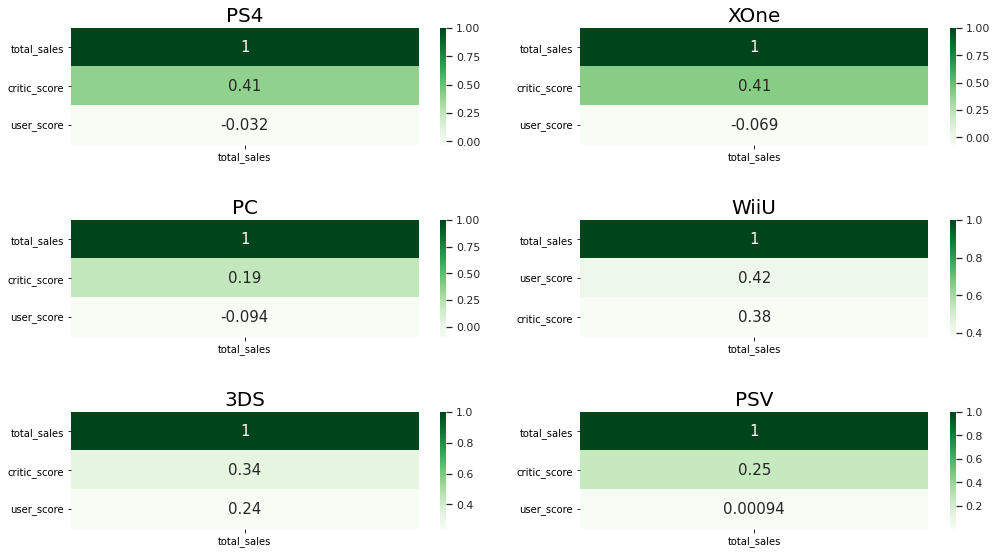

In [86]:
top_platforms = ['PS4','XOne','PC','WiiU','3DS', 'PSV']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = games[(games['platform'] == curr_platform) & (games['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['total_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                         cmap="Greens", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

- По убыванию корреляции(оценка критиков)--> XOne, PS4,WiiU, 3DS, PSV,PC. 

- По убыванию корреляции(оценка пользователей) почти нет связи за исключением WiiU, 3DS. Здесь решают пользователи.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [87]:
distr_genre = games_top_6_platforms.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
distr_genre

genre  total_sales
0         Action        99.56
1   Role-Playing        45.83
2        Shooter        33.31
3         Sports        32.46
4           Misc        20.37
5      Adventure        14.82
6       Platform        12.55
7       Fighting        11.49
8         Racing         9.68
9       Strategy         7.24
10    Simulation         7.07
11        Puzzle         3.13

Text(0, 0.5, 'Продажи')

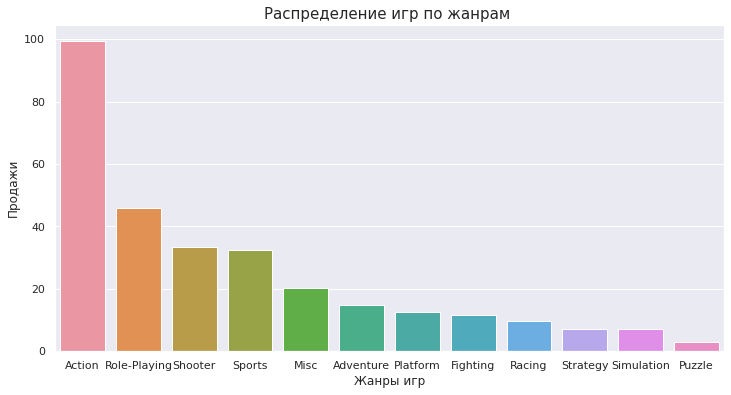

In [88]:
#Построим график, чтобы посмотреть какие жанры лидируют 
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

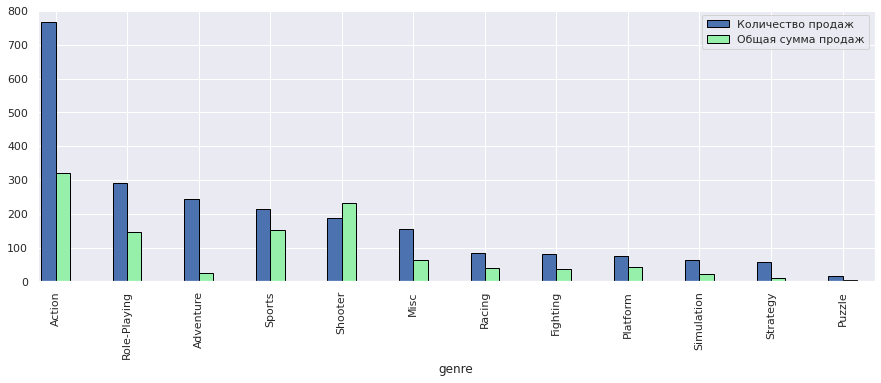

In [89]:
ax = plt.gca()

pivot = games.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#97F0AA', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])

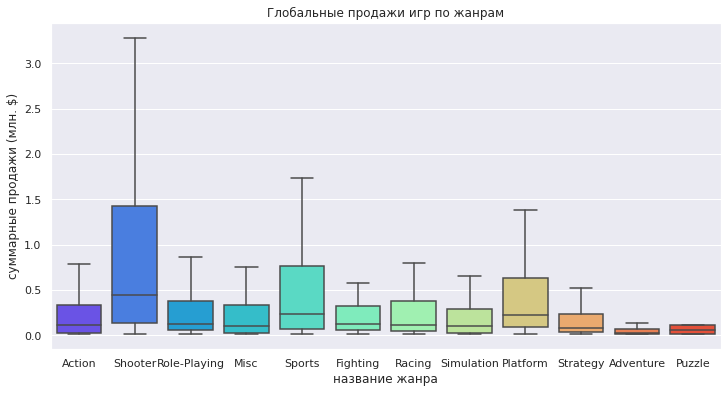

In [90]:
#Построим боксплот глобальных продаж игр по жанрам с выбросами
fig = plt.subplots(figsize=(12,6))
plt.title("Глобальные продажи игр по жанрам")
plot = sns.boxplot(x="genre", y="total_sales", data=games, palette='rainbow', showfliers=False)
plt.xlabel('название жанра')
plt.ylabel('суммарные продажи (млн. $)')
plt.show()

In [91]:
games_1 = games.query('year_of_release >=2014')

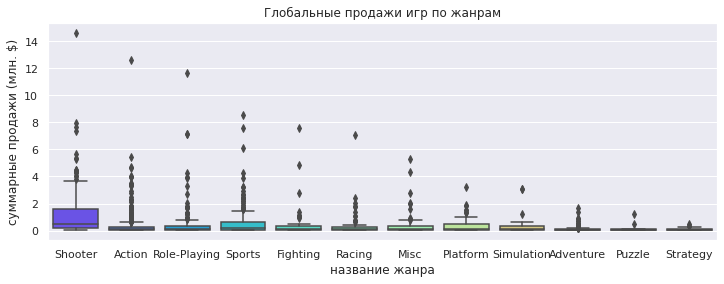

In [92]:
#Построим боксплот глобальных продаж игр по жанрам с выбросами
fig = plt.subplots(figsize=(12,4))
plt.title("Глобальные продажи игр по жанрам")
plot = sns.boxplot(x="genre", y="total_sales", data=games_1, palette='rainbow')
plt.xlabel('название жанра')
plt.ylabel('суммарные продажи (млн. $)')
plt.show()

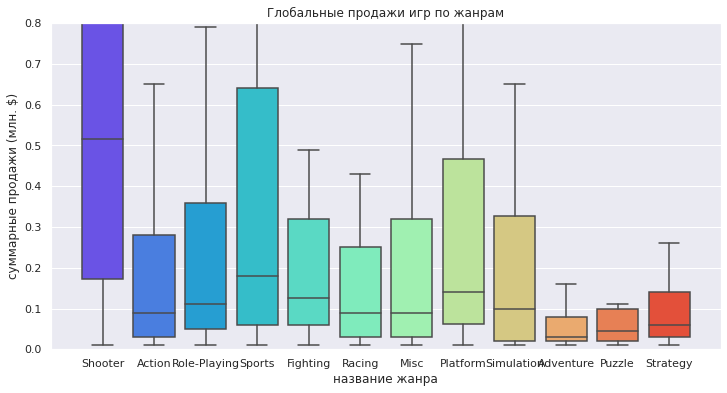

In [93]:
#Построим боксплот глобальных продаж игр по актуальным жанрам без выбросов
fig = plt.subplots(figsize=(12,6))
plt.title("Глобальные продажи игр по жанрам")
plot = sns.boxplot(x="genre", y="total_sales", data=games_1, palette='rainbow', showfliers=False)
plt.xlim([-1, 12])
plt.ylim([0, 0.8])
plt.xlabel('название жанра')
plt.ylabel('суммарные продажи (млн. $)')
plt.show()

Сравним медианные продажи на каждом жанре и проверим, какая из них более стабильна и имеет более длинный ряд успешно продающихся игр. Лидируют:

- Shooter
- Sports
- Platform

In [94]:
games_1.genre.unique() 

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

count    128.000000
mean       1.335469
std        2.050567
min        0.010000
25%        0.172500
50%        0.515000
75%        1.617500
max       14.630000
Name: total_sales, dtype: float64

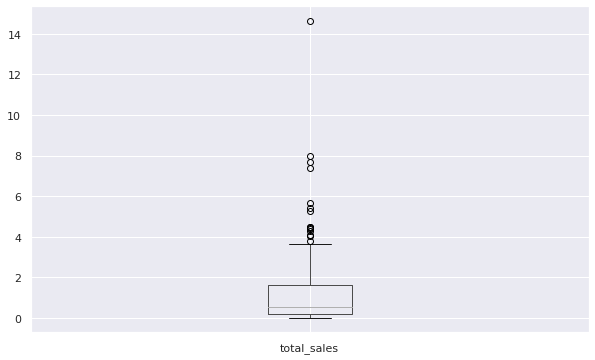

In [95]:
Shooter_genre_sales = games_1.query('genre =="Shooter"')
Shooter_genre_sales.boxplot(column = 'total_sales', figsize=(10,6))
Shooter_genre_sales['total_sales'].describe()

count    619.000000
mean       0.322068
std        0.798181
min        0.010000
25%        0.030000
50%        0.090000
75%        0.280000
max       12.620000
Name: total_sales, dtype: float64

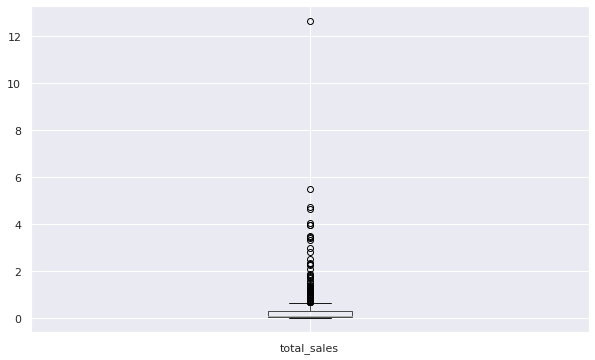

In [96]:
Action_genre_sales = games_1.query('genre =="Action"')
Action_genre_sales.boxplot(column = 'total_sales', figsize=(10,6))
Action_genre_sales['total_sales'].describe()

count    221.000000
mean       0.459005
std        1.177284
min        0.010000
25%        0.050000
50%        0.110000
75%        0.360000
max       11.680000
Name: total_sales, dtype: float64

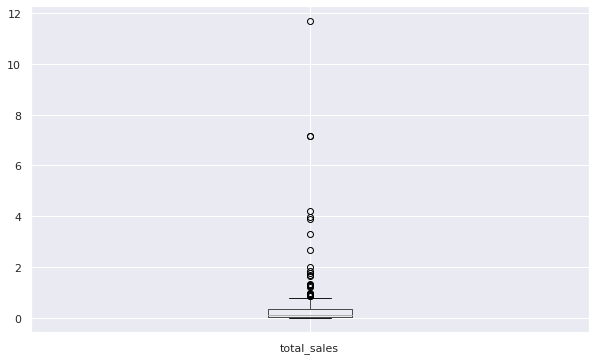

In [97]:
RP_genre_sales = games_1.query('genre =="Role-Playing"')
RP_genre_sales.boxplot(column = 'total_sales', figsize=(10,6))
RP_genre_sales['total_sales'].describe()

count    161.000000
mean       0.680000
std        1.239736
min        0.010000
25%        0.060000
50%        0.180000
75%        0.640000
max        8.580000
Name: total_sales, dtype: float64

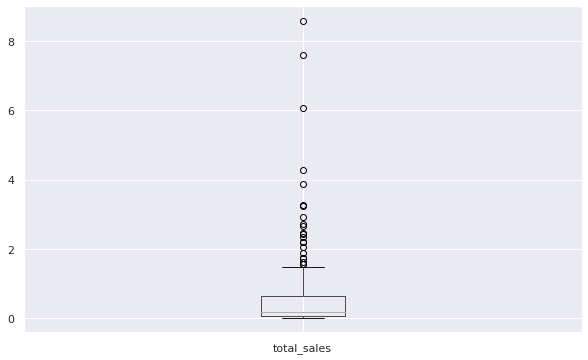

In [98]:
sp_genre_sales = games_1.query('genre =="Sports"')
sp_genre_sales.boxplot(column = 'total_sales', figsize=(10,6))
sp_genre_sales['total_sales'].describe()

count    60.000000
mean      0.470333
std       1.188053
min       0.010000
25%       0.060000
50%       0.125000
75%       0.320000
max       7.550000
Name: total_sales, dtype: float64

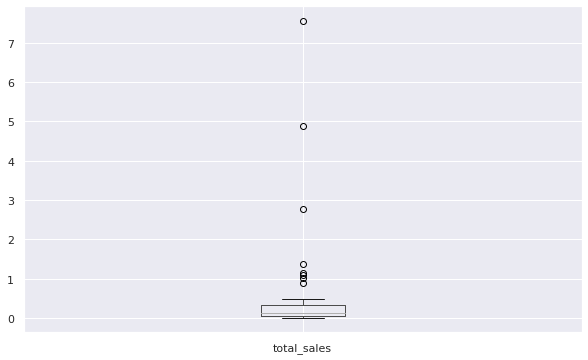

In [99]:
fi_genre_sales = games_1.query('genre =="Fighting"')
fi_genre_sales.boxplot(column = 'total_sales', figsize=(10,6))
fi_genre_sales['total_sales'].describe()

count    69.000000
mean      0.398841
std       0.963716
min       0.010000
25%       0.030000
50%       0.090000
75%       0.250000
max       7.090000
Name: total_sales, dtype: float64

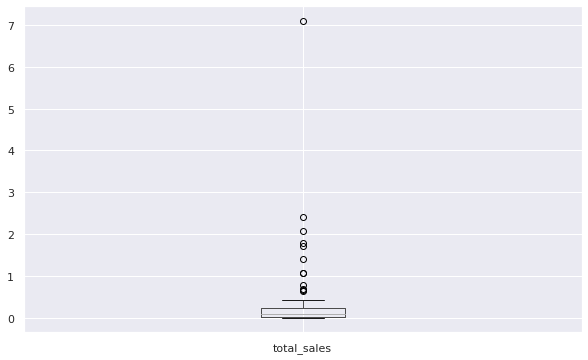

In [100]:
rc_genre_sales = games_1.query('genre =="Racing"')
rc_genre_sales.boxplot(column = 'total_sales', figsize=(10,6))
rc_genre_sales['total_sales'].describe()

count    38.000000
mean      0.476053
std       0.722561
min       0.010000
25%       0.062500
50%       0.140000
75%       0.467500
max       3.210000
Name: total_sales, dtype: float64

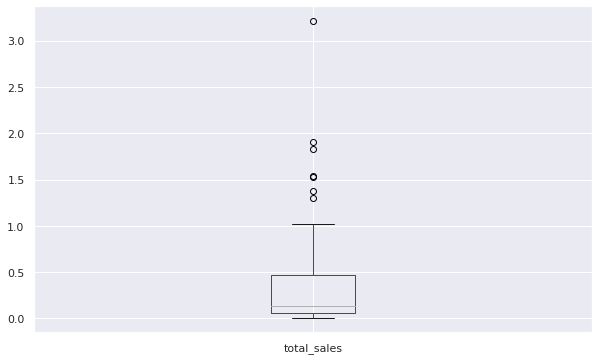

In [101]:
pl_genre_sales = games_1.query('genre =="Platform"')
pl_genre_sales.boxplot(column = 'total_sales', figsize=(10,6))
pl_genre_sales['total_sales'].describe()

count    113.000000
mean       0.332301
std        0.736999
min        0.010000
25%        0.030000
50%        0.090000
75%        0.320000
max        5.270000
Name: total_sales, dtype: float64

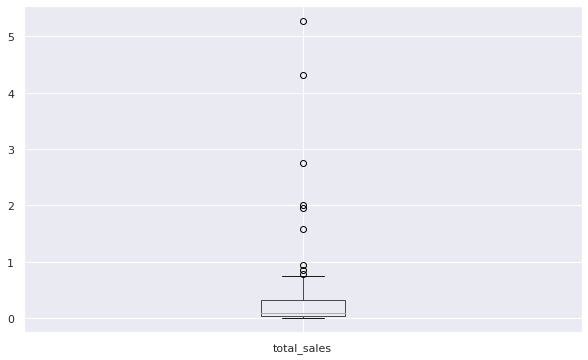

In [102]:
ms_genre_sales = games_1.query('genre =="Misc"')
ms_genre_sales.boxplot(column = 'total_sales', figsize=(10,6))
ms_genre_sales['total_sales'].describe()

count    44.000000
mean      0.298409
std       0.646925
min       0.010000
25%       0.020000
50%       0.100000
75%       0.327500
max       3.050000
Name: total_sales, dtype: float64

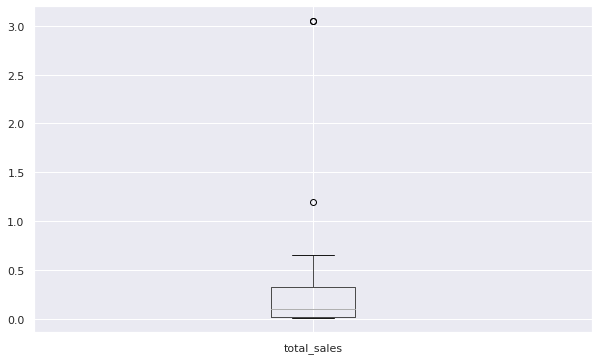

In [103]:
sm_genre_sales = games_1.query('genre =="Simulation"')
sm_genre_sales.boxplot(column = 'total_sales', figsize=(10,6))
sm_genre_sales['total_sales'].describe()

count    185.000000
mean       0.094865
std        0.203147
min        0.010000
25%        0.020000
50%        0.030000
75%        0.080000
max        1.660000
Name: total_sales, dtype: float64

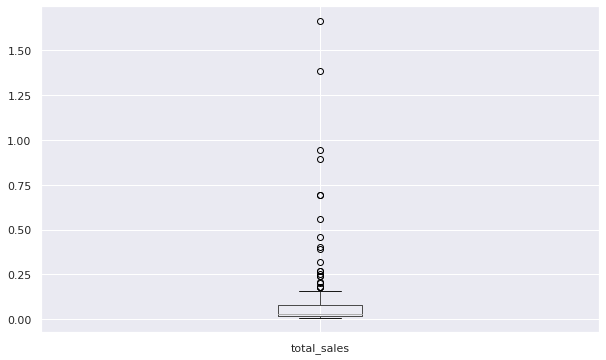

In [104]:
av_genre_sales = games_1.query('genre =="Adventure"')
av_genre_sales.boxplot(column = 'total_sales', figsize=(10,6))
av_genre_sales['total_sales'].describe()

count    14.000000
mean      0.157857
std       0.320629
min       0.010000
25%       0.020000
50%       0.045000
75%       0.100000
max       1.190000
Name: total_sales, dtype: float64

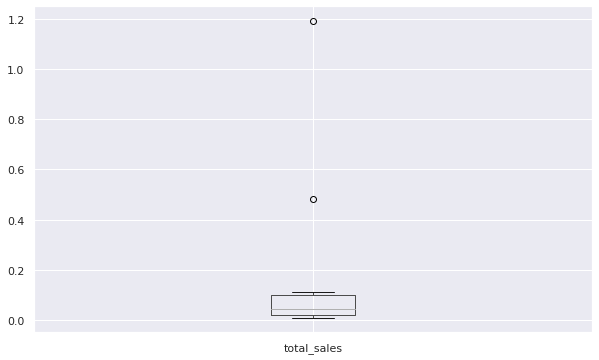

In [105]:
av_genre_sales = games_1.query('genre =="Puzzle"')
av_genre_sales.boxplot(column = 'total_sales', figsize=(10,6))
av_genre_sales['total_sales'].describe()

count    37.000000
mean      0.107027
std       0.118412
min       0.010000
25%       0.030000
50%       0.060000
75%       0.140000
max       0.520000
Name: total_sales, dtype: float64

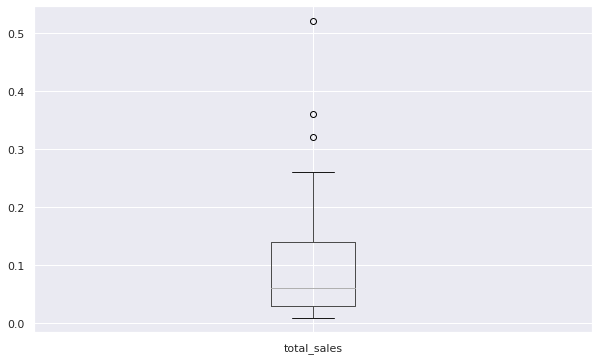

In [106]:
st_genre_sales = games_1.query('genre =="Strategy"')
st_genre_sales.boxplot(column = 'total_sales', figsize=(10,6))
st_genre_sales['total_sales'].describe()

**Вывод**


На данном этапе исследования выявлено, что в разные годы были популярны (и приносили доход) игры на разных платформах. 

Игры на Playstation набирали популярность с 1994 года, достигли пика по продажам в 1990 году и сошли на нет в 2002-2003 годах. На замену таким играм в 2000 году пришли игры на Playstation2, достаточно долго (с 2001 по 2005 гг.) лидируя на рынке игр по продажам. Им на смену пришли игры  карманных консолей DS, которые с 2004 года набрали моментальную популярность в 2005-2010 гг. 

Практически в это же время (с 2006 по 2010 гг. с пиком в 2009 г.) были популярны игры на платформе Wii, с самой малоразмерной на тот момент приставкой Nintendo Wii. В те же годы на смену Playstation2 пришли игры на платформе Playstation3, которые продавались максимально хорошо в 2008-2013 гг. Вместе с Playstation3 в те же годы были популярны игры на Xbox360. Примерный срок, за который устаревает платформа, составляет около 8-10 лет. Также следует отметить, что со временем стало появляться больше конкурентоспособных платформ, способных занять нишу и привлечь свою категорию потребителей.

Исходя из анализа количества выпущенных игр по годам и анализа продаж по платформам, продажа игр на которых приносит наибольший доход, можем сделать вывод о том, что период до 1994 года не является актуальным для анализа. До 1994 года выходило слишком мало игр, относительно общей выборки и не наблюдалось лидирующих по суммарным продажам платформ. Более того, только за последние 10 лет мы наблюдаем и большое количество игр, и большой выбор платформ, которые могут составить друг-другу конкуренцию. В связи с этим, актуальным для анализа срезом данных является период с 2006 по 2015 год.

На основе анализа продаж можем сделать прогноз, что потенциально прибыльными в 2017 году будут платформы: 3DS, которая уже несколько лет пользуется популярностью у потребителей игр; Playstation4, только набирающая обороты и приносящая самый высокий доход от продаж; PlaystationVita, не настолько популярная (что может быть связано с меньшим количеством игр на данной платформе), но также потенциально прибыльная в ближайшие 2-3 года; WiiU, являющаяся преемником Wii, которая тоже была достаточно популярна в своё время; а также XBoxOne от компании Microsoft, способная составить конкуренцию Playstation4. При этом наблюдается рост популярности у потребителей игр для Playstation4 и XBoxOne; и снижение спроса на игры на платформах 3DS, PlaystationVita и WiiU, тем не менее, даже они потенциально могут принести достаточно высокий доход до появления аналогов нового поколения.

На каждой из платформ существует большое количество игр, суммарные продажи по которым выбиваются из квартильных значений. В целом, разница в суммарных продажах игр в рамках каждой из платформ очень велика для 3DS и Playstation4; чуть меньше - для WiiU и XBoxOne; и относительно небольшая - для PlaystationVita. 

По всем платформам наблюдается превышение среднего значения над медианным и скос датасетов вправо: для Playstation4 и XBoxOne наиболее сильно, для 3DS и WiiU - чуть меньше, и для PlayStationVita - относительно небольшой. 

Также видим различия в медианных значениях: игры yf Playstation4 и XBoxOne имеют схожие боксплоты (квартильные, средние и медианные значения), а WiiU характеризуется меньшим значением; затем идёт 3DS и PlayStationVita. Это может быть связано с разнобразием игр на ведущих платформах: поскольку платформы Playstation и XBox достаточно давно приобрели популярность среди потребителей, они могут позволить себе выпуск достаточно ранжированного по цене игрового контента, способного найти своего потребителя: поэтому их боксплоты шире и растянутее. 

Wii тоже достаточно старая (в версиях предыдущих поколений), но менее популярная - соответственно разнообразие игр на данной платформе может быть ниже. Что касается PlaystationVita - это консоль с небольшим разнообразием игр, которые, как мы видим по боксплоту, схожи в ценовой категории и по продажам - разброс по данной платформе самый небольшой, и среднее значение не сильно превосходит медианное.

При анализе связи между оценкой игры и совокупными продажами было выявлено, что между оценкой критиков и продажами есть слабая связь (во всех регионах, кроме Японии), причём для популярных платформ она чуть сильнее, чем для непопулярных. А между оценкой пользователей и совокупными продажами нет связи (ни для популярных, ни для непопулярных платформ). С одной стороны, это может быть связано с тем, что люди обращают внимание на оценку игры, прежде чем покупают её (но корреляция невысокая, соответственно, это не ключевой показатель). С другой стороны, возможно, критиками оцениваются не все игры, а наиболее популярные у покупателей (или потенциально популярные - по "рейтингу ожидания"). В то же время потребитель сначала покупает игру, а затем, поиграв, ставит ей оценку, исходя из субъективного впечатления. 

Таким образом, одна и та же игра может оставить как хорошее, так и плохое впечатление - в зависимости от индивидуальных предпочтений. Поскольку связь оценок с сумммами продаж не является сильной, мы можем сделать вывод, что на продажи игр влияют какие-то иные факторы.

Анализ продаж по жанрам показал, что самым прибыльным жанром является "Экшн", но прибыльность жанра связана с продажей нескольких, выбивающихся, дорогих игр. На втором месте по доходу за анализируемый актуальный период находится жанр "Спорт", но и для него характерна схожая ситуация. Третьей по доходности позиция - жанр "Шутер". Это самое доходное, в среднем, направление игр, пользующееся высоким спросом. Средний и медианный уровни продаж этого жанра выше значений по любому другому жанру; а также датасет в разрезе данного жанра сильно скошен вправо (очень много покупателей покупает отдельные игры с высокой ценой), а значит, это перспективное направление для продажи. 

Самый низкий доход принёс жанр "Стратегия", но это не значит, что покупатели приобретают в этом жанре самые дешевые игры. Мы наблюдаем подобную ситуацию как для "Экшна" и "Спорта", но действующую зеркально. Жанр "Квест" имеет схожую со "Стратегией" характеристику по продаваемости: они слабо продаются и принесли минимальный доход, но это не самые неперспективные жанры. Самым неперспективным жанром игр для продаж является "Приключения". Он на третьем месте с конца по суммарным продажам; и по распределению наибольшее число игр было продана за низшую, по сравнению с другими жанрами, цену.

## Портрет пользователя в регионах

### Самые популярные платформы

**Определим для пользователя каждого региона (NA, EU, JP):**

- самые популярные платформы (топ-5), опишем различия в долях продаж;
- самые популярные жанры (топ-5), поясним разницу;
- определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [107]:
#Функция для создания графиков top_in_regions_plot
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'red', 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

Cамые популярные платформы (топ-5)


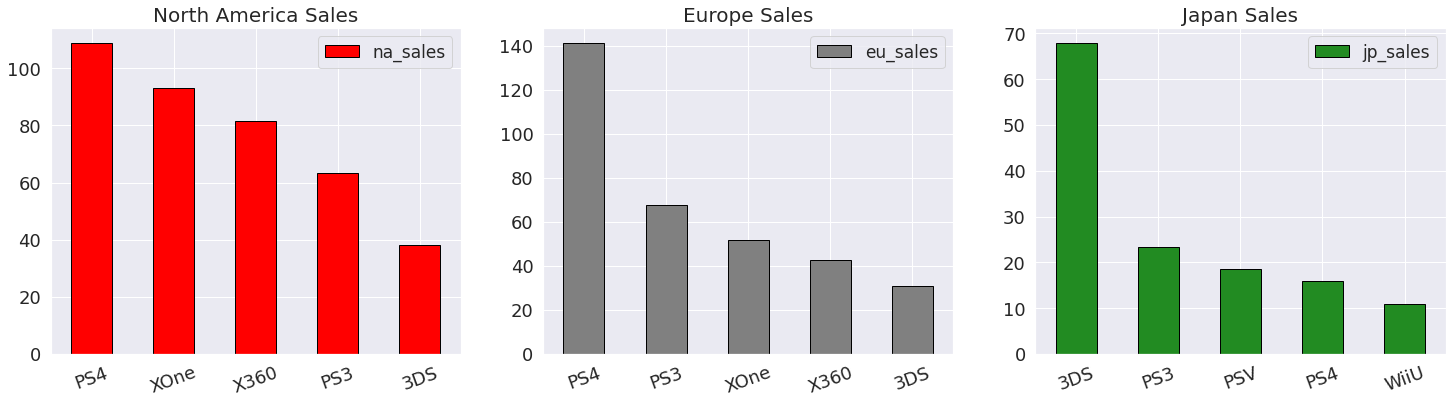

In [108]:
print ('Cамые популярные платформы (топ-5)')
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

- В Северной Америке, популярны приставки PS4, XOne и X360. Немного отстают - PS3 и 3DS.

- В Европе, с большим отрывом лидирует PS4. Далее PS3 и XOne. Замыкают рейтинг X360 и 3DS.

- В Японии, явный лидер - 3DS. За ним PS3, PSV, PS4 и WiiU.

### Самые популярные жанры

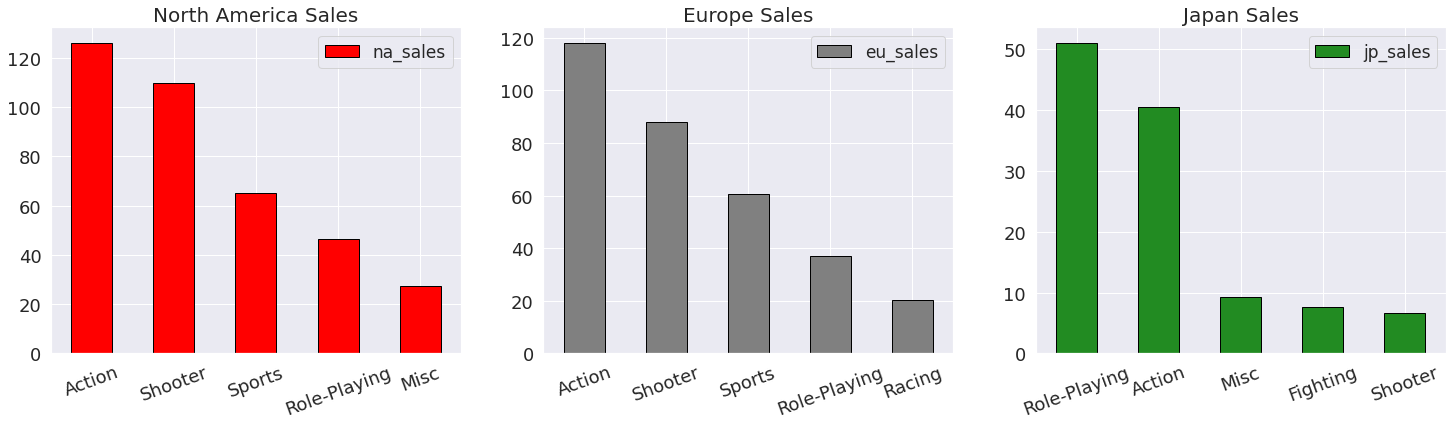

In [109]:
#Определение самых популярных жанров в заданных регионах
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

Вкусы в Северной Америке и Европе схожи: экшены, спортивные игры и шутеры в топе. В Северной Америке больше играют в ролевые игры, в Европе же чаще выбирают гонки.

В Японии вкус совершенно иной - на первом месте ролевые игры, причем с большим отрывом. Далее экшны и спортивные игры.

### Влияние рейтинга на продажи

In [110]:
ESRB_dict = {'E': 'Для всех','EC': '> 6 лет', 'E10+': '> 10 лет', 'M': '> 17 лет', 'T': '> 13 лет',\
             'AO': 'Для взрослых', 'RP': 'Рейтинг обсуждается', 'Nan': 'Не определен'}
games['ESRB_description'] = games[games['rating'].notnull()]['rating'].map(ESRB_dict)

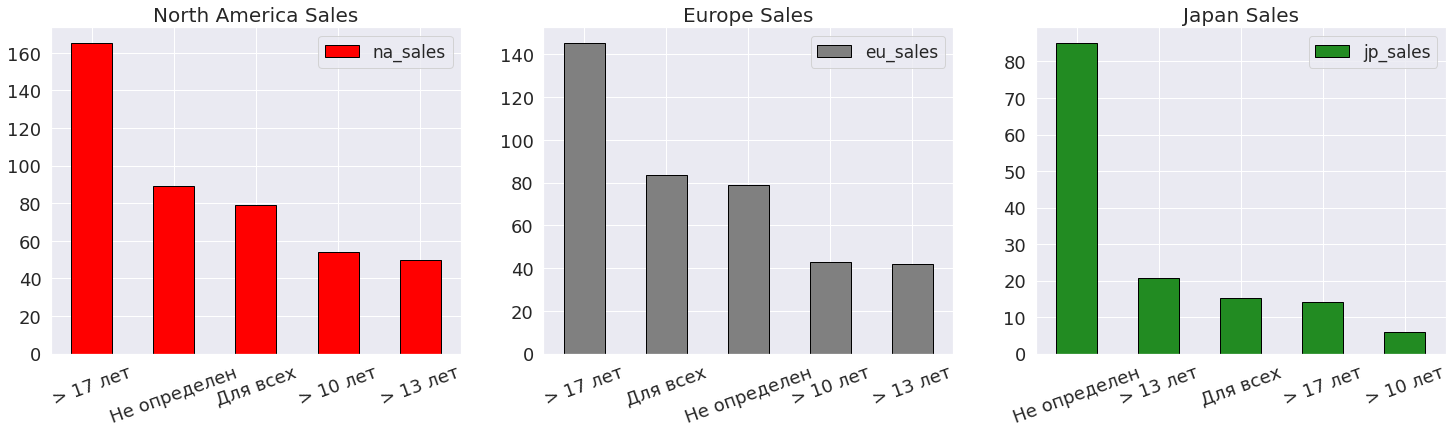

In [111]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

В Северной Америке и в Европе картина практически одинаковая. Большая часть выручки получена от игр с рейтингом "> 17 лет", а далее по "взрослости" игр.

В Японии снова не так. Первое место - рейтинг "Не определен", скорее всего это связано с тем, что рейтнг ESRB проводит американская компания и не все японские игры его проходят. На втором месте игры с рейтингом "> 13 лет", значит в Японии компьютерными играми увлекаются с детства.

### check

#### Другая категория платформ или жанров

In [112]:
wrld_genre = games.groupby('genre')\
    .agg({'platform': 'count', 'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})\
    .sort_values(by='platform', ascending=False).reset_index()

wrld_genre

genre  platform  na_sales  eu_sales  jp_sales
0         Action       766    126.05    118.13     40.49
1   Role-Playing       292     46.40     36.97     51.04
2      Adventure       245      7.14      8.25      5.82
3         Sports       214     65.27     60.52      5.41
4        Shooter       187    109.74     87.86      6.61
5           Misc       155     27.49     20.04      9.20
6         Racing        85     12.96     20.19      2.30
7       Fighting        80     15.55      8.55      7.65
8       Platform        74     18.14     15.58      4.79
9     Simulation        62      4.86     10.92      4.52
10      Strategy        56      3.28      4.22      1.77
11        Puzzle        17      0.83      1.00      1.18

In [113]:
cat_other= wrld_genre[:5]
cat_other = cat_other.append({'platform': 'Other', 'eu_sales': wrld_genre['eu_sales'][:5].sum()-wrld_genre['eu_sales'][:5].sum(),
                  'jp_sales': wrld_genre['jp_sales'][:5].sum()-wrld_genre['jp_sales'][:5].sum(),
                  'na_sales': wrld_genre['na_sales'][:5].sum()-wrld_genre['na_sales'][:5].sum()}, ignore_index = True)
cat_other

genre platform  na_sales  eu_sales  jp_sales
0        Action      766    126.05    118.13     40.49
1  Role-Playing      292     46.40     36.97     51.04
2     Adventure      245      7.14      8.25      5.82
3        Sports      214     65.27     60.52      5.41
4       Shooter      187    109.74     87.86      6.61
5           NaN    Other      0.00      0.00      0.00

In [114]:
wrld_platform = games.groupby('platform')\
    .agg({'genre': 'count', 'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})\
    .sort_values(by='platform', ascending=False).reset_index()

wrld_platform

platform  genre  na_sales  eu_sales  jp_sales
0      XOne    247     93.12     51.59      0.34
1      X360    186     81.66     42.52      0.51
2      WiiU    115     29.21     19.85     10.88
3       Wii     23      6.56      5.93      0.05
4       PSV    358      5.04      6.10     18.59
5       PSP     67      0.00      0.17      3.29
6       PS4    392    108.74    141.09     15.96
7       PS3    345     63.50     67.81     23.35
8        PC    189     11.11     25.36      0.00
9        DS      8      0.57      0.85      0.00
10      3DS    303     38.20     30.96     67.81

In [115]:
plt_other = wrld_platform[:5]
plt_other = plt_other.append({'platform': 'Other', 'eu_sales': wrld_genre['eu_sales'][:5].sum()-wrld_genre['eu_sales'][:5].sum(),
                  'jp_sales': wrld_genre['jp_sales'][:5].sum()-wrld_genre['jp_sales'][:5].sum(),
                  'na_sales': wrld_genre['na_sales'][:5].sum()-wrld_genre['na_sales'][:5].sum()}, ignore_index = True)
# cat_other

plt_other

platform  genre  na_sales  eu_sales  jp_sales
0     XOne  247.0     93.12     51.59      0.34
1     X360  186.0     81.66     42.52      0.51
2     WiiU  115.0     29.21     19.85     10.88
3      Wii   23.0      6.56      5.93      0.05
4      PSV  358.0      5.04      6.10     18.59
5    Other    NaN      0.00      0.00      0.00

In [116]:
wrld_platform[:5]

platform  genre  na_sales  eu_sales  jp_sales
0     XOne    247     93.12     51.59      0.34
1     X360    186     81.66     42.52      0.51
2     WiiU    115     29.21     19.85     10.88
3      Wii     23      6.56      5.93      0.05
4      PSV    358      5.04      6.10     18.59

In [117]:
wrld_platform.sort_values(by='jp_sales', ascending=False)

platform  genre  na_sales  eu_sales  jp_sales
10      3DS    303     38.20     30.96     67.81
7       PS3    345     63.50     67.81     23.35
4       PSV    358      5.04      6.10     18.59
6       PS4    392    108.74    141.09     15.96
2      WiiU    115     29.21     19.85     10.88
5       PSP     67      0.00      0.17      3.29
1      X360    186     81.66     42.52      0.51
0      XOne    247     93.12     51.59      0.34
3       Wii     23      6.56      5.93      0.05
8        PC    189     11.11     25.36      0.00
9        DS      8      0.57      0.85      0.00

In [118]:
# Самые популярные платформы JP
plt_other = wrld_platform.sort_values(by='jp_sales', ascending=False)[:5][['platform', 'jp_sales']]
plt_other = plt_other.append({'platform': 'Other', 
                  'jp_sales': wrld_platform['jp_sales'].sum()-
                              wrld_platform['jp_sales'].sort_values(ascending=False)[:5].sum(),
                  }, ignore_index = True)

plt_other

platform  jp_sales
0      3DS     67.81
1      PS3     23.35
2      PSV     18.59
3      PS4     15.96
4     WiiU     10.88
5    Other      4.19

Самые популярные платформы JP - 3DS, PS3, PSV 

In [119]:
wrld_platform.sort_values(by='na_sales', ascending=False)

platform  genre  na_sales  eu_sales  jp_sales
6       PS4    392    108.74    141.09     15.96
0      XOne    247     93.12     51.59      0.34
1      X360    186     81.66     42.52      0.51
7       PS3    345     63.50     67.81     23.35
10      3DS    303     38.20     30.96     67.81
2      WiiU    115     29.21     19.85     10.88
8        PC    189     11.11     25.36      0.00
3       Wii     23      6.56      5.93      0.05
4       PSV    358      5.04      6.10     18.59
9        DS      8      0.57      0.85      0.00
5       PSP     67      0.00      0.17      3.29

In [120]:
# Самые популярные платформы NA
plt_other = wrld_platform.sort_values(by='na_sales', ascending=False)[:5][['platform', 'na_sales']]
plt_other = plt_other.append({'platform': 'Other', 
                  'na_sales': wrld_platform['na_sales'].sum()-
                              wrld_platform['na_sales'].sort_values(ascending=False)[:5].sum(),
                  }, ignore_index = True)

plt_other

platform  na_sales
0      PS4    108.74
1     XOne     93.12
2     X360     81.66
3      PS3     63.50
4      3DS     38.20
5    Other     52.49

Самые популярные платформы NA - PS4, XOne, X360

In [121]:
wrld_platform.sort_values(by='eu_sales', ascending=False)

platform  genre  na_sales  eu_sales  jp_sales
6       PS4    392    108.74    141.09     15.96
7       PS3    345     63.50     67.81     23.35
0      XOne    247     93.12     51.59      0.34
1      X360    186     81.66     42.52      0.51
10      3DS    303     38.20     30.96     67.81
8        PC    189     11.11     25.36      0.00
2      WiiU    115     29.21     19.85     10.88
4       PSV    358      5.04      6.10     18.59
3       Wii     23      6.56      5.93      0.05
9        DS      8      0.57      0.85      0.00
5       PSP     67      0.00      0.17      3.29

In [122]:
# Самые популярные платформы EU
plt_other = wrld_platform.sort_values(by='eu_sales', ascending=False)[:5][['platform', 'eu_sales']]
plt_other = plt_other.append({'platform': 'Other', 
                  'eu_sales': wrld_platform['eu_sales'].sum()-
                              wrld_platform['eu_sales'].sort_values(ascending=False)[:5].sum(),
                  }, ignore_index = True)

plt_other

platform  eu_sales
0      PS4    141.09
1      PS3     67.81
2     XOne     51.59
3     X360     42.52
4      3DS     30.96
5    Other     58.26

Самые популярные платформы EU - PS4, PS3, XOne

## Проверка статистических гипотез

### Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC

Мы будем анализировать две генеральные совокупности: рейтинг пользователей игр на платформе XBoxOne (xboxone_games) и PC (pc_games)

In [123]:
xboxone_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['platform'] == "XOne")]
pc_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['platform'] == "PC")]

Прежде чем формулировать или проверять статистические гипотезы, удостоверимся, что сравниваемые наборы имеют нормальное распределение

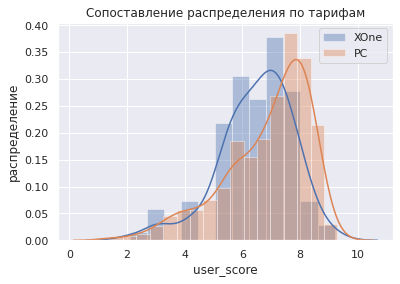

In [124]:
fig = plt.figure()
plt.xlabel('xlabel')
plt.ylabel('распределение')
plt.title('Сопоставление распределения по тарифам')
sns.distplot(xboxone_games['user_score'], label='XOne')
sns.distplot(pc_games['user_score'], label='PC')
plt.legend()
plt.show()

Данные распределены нормально, хоть и смещены вправо.

Сформулируем нулевую гипотезу H0: Средние двух генеральных совокупностей равны между собой.

Альтернативная гипотеза H1: Средние двух генеральных совокупностей не равны между собой.

Xboxone_games и pc_games - это не совсем генеральные совокупности, а скорее выборки. Но согласно центральной предельной теореме, выборочные средние распределены нормально вокруг истинного среднего генеральной совокупности. Введём уровень значимости, определяющий близость к среднему значению: 5%.

Кроме того, дисперсия каждой выборки должна быть оценена по датасету каждой из выборок, а не по их объединению. Также отметим, что выборки являются независимыми.

Проверим гипотезы через распределение t-Стьюдента.

In [125]:
sample_1 = xboxone_games['user_score']
sample_2 = pc_games['user_score']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.003919849356846717
Отвергаем нулевую гипотезу.


Получили результат: p-значение оказалось меньше уровня значимости в 5%. Соответственно, мы отвергли нулевую гипотезу и приняли альтернативную гипотезу - средние двух генеральных совокупностей не равны между собой.

Вывод: средние пользовательские рейтинги платформ Xbox One и PC различаются.

Гипотезы:

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.


Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.

Определим пороговое значение alpha = 0.05
Гипотеза № 1:
средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

### Гипотеза о различии средних пользовательских рейтингов жанров Action и Sports

Мы будем анализировать две генеральные совокупности: рейтинг пользователей игр в жанре Action (action_games) и Sports (sports_games)

In [126]:
action_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['genre'] == "Action")]
sports_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['genre'] == "Sports")]

Прежде чем формулировать или проверять статистические гипотезы, удостоверимся, что сравниваемые наборы имеют нормальное распределение

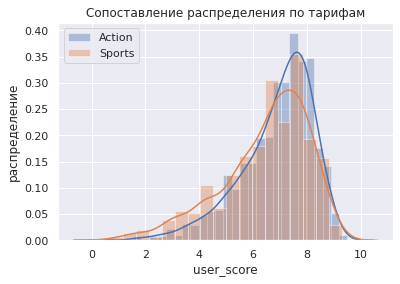

In [127]:
fig = plt.figure()
plt.xlabel('xlabel')
plt.ylabel('распределение')
plt.title('Сопоставление распределения по тарифам')
sns.distplot(action_games['user_score'], label='Action')
sns.distplot(sports_games['user_score'], label='Sports')
plt.legend()
plt.show()

Данные, хотя немного и смещены вправо, имеют нормальное распределение.

Сформулируем нулевую гипотезу H0: Средние двух генеральных совокупностей равны между собой.

Альтернативная гипотеза H1: Средние двух генеральных совокупностей не равны между собой.

Несмотря на то, что action_games и sports_games - это не совсем генеральные совокупности, а скорее, выборки; но согласно центральной предельной теореме, выборочные средние распределены нормально вокруг истинного среднего генеральной совокупности. Введём уровень значимости, определяющий близость к среднему значению: 5%.

Кроме того, дисперсия каждой выборки должна быть оценена по датасету каждой из выборок, а не по их объединению. Также отметим, что выборки являются независимыми.

Проверим гипотезы через распределение t-Стьюдента.

In [128]:
sample_1 = action_games['user_score']
sample_2 = sports_games['user_score']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 2.193525295970131e-08
Отвергаем нулевую гипотезу.


Получили результат: p-значение оказалось меньше уровня значимости в 5%. Соответственно, мы отвергли нулевую гипотезу; приняли альтернативную гипотезу: средние двух генеральных совокупностей не равны между собой.

Вывод: средние пользовательские рейтинги жанров Action и Sports различаются.

**Вывод**

Проведены t-тесты проверки двусторонних гипотез для двух независимых выборок. В результате данных тестов выявлено, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

Средние пользовательские рейтинги жанров Action и Sports также различаются.

## Общий вывод

Мы провели исследование рынка компьютерных игр, на который ориентируется международный интернет-магазин «Стримчик». 

В ходе предобработки данных обнаружена **интересная тенденция:** количество игр без оценки критиков по годам выпуска почти соответствует количеству игр, для которых нет оценки пользователей. А также, количеству игр без рейтинга организации ESRB. 

Характерная динамика показателей может быть связана с тем, что игр стало выходить больше. В результате, пользователи распределились между играми, не имея возможности оценить каждую. Также появилось большее количество платформ -  и часть пользователей, имеющая возможность поиграть на одной из платформ, не может позволить себе другие платформы. Некоторые игры являются неэксклюзивными только для одной платформы, они встречаются на всех платформах. Соответственно, могут быть неоценены пользователями, критиками и ESRB. 

Также, часть пропусков за последние годы связана с показателем tbd (to be determined): игра была оценена, но система не посчитала рейтинг на момент выгрузки данных (рейтинг по оценке пользователей будет представлен позже). 

Что касается пропусков в оценках критиков и рейтинге ESRB, возможно, часть игр также не была сведена в оценку и рейтинг на момент выгрузки. Оценка и рейтинг появятся немного позже. Кроме того, критики и ESRB, вероятно, оценивают и выставляют рейтинг не каждой вышедшей игре, а наиболее ожидаемым и пользующимся спросом играм. Либо игре - только на одной из платформ. Также возможно, что данные по оценкам и рейтингу отсутствуют в открытом доступе.

**Исследовательский анализ** показал, что в разные годы были популярны (и приносили доход) игры на разных платформах. 

- Игры на Playstation набрали популярность с 1994 года, достигли пика по продажам в 1990 году и сошли с дистанции в 2002-2003 годах. На замену таким играм в 2000 году пришли игры на Playstation2, достаточно долго (с 2001 по 2005 гг.) лидируя на рынке игр по продажам. 

- Им на смену пришли игры на карманных консолях DS, которые набрали популярность в 2005-2010 годы. Практически в то же время (с 2006 по 2010 с пиком в 2009) взлетели игры на платформе Wii (с самой малоразмерной на тот момент приставкой Nintendo Wii). Тогда же, на смену Playstation2 пришла Playstation3, которая продавались максимально хорошо в 2008-2013 гг. 

- Вместе с Playstation3 в те же годы были популярны игры на Xbox360. Примерный срок, за который устаревает платформа, составляет около 8-10 лет. Также следует отметить, что со временем стало появляться больше конкурентоспособных платформ, способных занять нишу и привлечь свою категорию потребителей.

Исходя из анализа количества выпущенных игр по годам и анализа продаж по высокомаржинальным платформам, можем сделать вывод, что период до 1994 года не актуальнен для анализа. До 1994 года выходило слишком мало игр, относительно общей выборки и не наблюдалось лидирующих по суммарным продажам платформ. 

На основе анализа продаж предположим, что потенциально прибыльными в 2017 году будут платформы: 

- 3DS, которая уже несколько лет популярна у игроков; 
- Playstation4, только набирающая обороты и приносящая самую высокую прибыль; 
- PlaystationVita, не настолько популярная (что может быть связано с меньшим количеством игр на данной платформе), но также потенциально прибыльная в ближайшие 2-3 года; 
- WiiU, преемник Wii, которая тоже была достаточно популярна в своё время;
- XBoxOne от компании Microsoft, способная составить конкуренцию Playstation4. 

При этом наблюдается рост популярности у потребителей игр для Playstation4 и XBoxOne и снижение спроса на игры платформ 3DS, PlaystationVita и WiiU. Тем не менее, даже они потенциально могут принести достаточно высокий доход до появления аналогов нового поколения. На данных платформах игры выходили в период с 2011 года, поэтому актуальным для анализа срезом данных является период с 2011 по 2015 год.

На каждой из платформ существует большое количество игр, суммарные продажи по которым выбиваются из квартильных значений. 

В целом, разница в суммарных продажах игр на каждой из платформ очень велика для 3DS и Playstation4. Чуть меньше она - для WiiU и XBoxOne. И относительно небольшая - для PlaystationVita. 

По всем платформам наблюдается превышение среднего значения над медианным и скос датасетов вправо: для Playstation4 и XBoxOne наиболее сильно, для 3DS и WiiU - чуть меньше, и для PlayStationVita - относительно небольшой. 

Также видим различия в медианных значениях: игры от Playstation4 и XBoxOne имеют схожие боксплоты (квартильные, средние и медианные значения), а WiiU характеризуется меньшим значением; затем идёт 3DS и PlayStationVita. Это может быть связано с разнобразием игр на ведущих платформах: поскольку платформы Playstation и XBox достаточно давно набрали популярность у потребителей, они могут позволить себе выпуск ранжированного по цене игрового контента, способного найти своего потребителя: поэтому их боксплоты шире и растянутее. 

Wii тоже достаточно старая (в версиях предыдущих поколений), но менее популярная - соответственно разнообразие игр на данной платформе может быть ниже. Что касается PlaystationVita - это консоль с небольшим разнообразием игр, которые, как мы видим по боксплоту, схожи в ценовой категории и по продажам - разброс по данной платформе самый небольшой, и среднее значение не сильно превосходит медианное.

При анализе связи оценки игры с совокупными продажами было выявлено, что между оценкой критиков и продажами есть слабая связь (во всех регионах, кроме Японии), причём для популярных платформ она чуть сильнее, чем для непопулярных. И между оценкой пользователей и совокупными продажами нет связи (ни для популярных, ни для непопулярных платформ). 

С одной стороны, это может быть связано с тем, что люди обращают внимание на оценку игры, прежде чем покупают её (но корреляция невысокая, соответственно, это не ключевой показатель). 

С другой стороны, возможно, критиками оцениваются не все игры, а наиболее популярные у покупателей (или потенциально популярные - по "рейтингу ожидания"). В то же время потребитель сначала покупает игру, а поиграв - ставит ей оценку, исходя из субъективного впечатления. Таким образом, одна и та же игра может оставить как хорошее, так и плохое впечатление - в зависимости от индивидуальных предпочтений. 

Поскольку связь оценок с сумммами продаж не сильна, мы можем сделать вывод, что на продажи игр влияют иные факторы.

**Анализ продаж по жанрам** Больше всего покупают игры жанра Action, возможно, это связано с тем, что игр данного жанра выпускается больше всех остальных и жанр он включает в себя другие жанры тоже. Sports идёт на втором месте и по количеству выпускаемых игр и по продажам. (Серии FIFA, PES и пр.) 

Shooter неожиданно стоит на третьем месте по продажам, хотя игр производится почти в два раза меньше. Этот жанр всегда востребован. Adventure сильно отстаёт по продажам, хотя игр выпускается много. Это нишевый жанр, как правилило также совмещенный с другими жанрами, а иначе быстро надоедает.

**Портрет пользователя региона** 

- В NA самая популярная платформа XOne. Европейцы предпочитают также XOne. В Японии популярны PSV.
- В NA и EU самые популярные жанры практически совпадают. В JP вкусы отличаются.
- Во всех регионах лидируют игры с рейтингом E - "Для всех". В Европе и Северной Амереке дальше идут по "старшенству". В Японии опять не так. Первое место такое же - "Для всех", а вот на втором - игры для лиц от 13 лет, далее 17+.

**Рейтинг игр:**

- В Северной Америке и в Европе картина практически одинаковая. Большая часть выручки получена от игр с рейтингом "> 17 лет", а далее по "взрослости" игр.

- В Японии снова не так. Первое место - рейтинг "Не определен", скорее всего это связано с тем, что рейтнг ESRB проводит американская компания и не все японские игры его проходят. На втором месте игры с рейтингом "> 13 лет", значит в Японии компьютерными играми увлекаются с детства.

Кроме того, были проведены **t-тесты**, в результате которых выявлено, что средние пользовательские рейтинги платформ Xbox One и PC различаются. И средние пользовательские рейтинги жанров Action и Sports также различаются.


**Рекомендации**

Для планирования рекламных кампаний на 2017 год, интернет-магазину "Стримчик" предложены следующие рекомендации:

1. Не ориентироваться в продаже игр на пользовательские оценки. Не придавать значения оценкам критиков, но принимать их во внимание.

2. Учитывать срок устаревания платформы 8-10 лет. Не выставлять на продажу игры на платформах, для которых этот срок приближается к 6-8 годам. Основной доход можно получить от продаж игр на платформах, вышедших до 6 лет назад.

3. Диверсифицировать продажи игр по платформам (есть тенденция популярности среди пользователей различных платформ) следующим образом: продавать игры на платформах XBoxOne и PlayStation4 - это потенциально самые доходные платформы. А также на платформах 3DS, PlaystationVita, WiiU - менее популярные, но потенциально доходные платформы.

4. Продажа игр по платформам в срезе регионов: в Северной Америке и Европе следует продавать игры на  XboxOne, X360, WiU, делая акцент на играх в жанре "Шутер" (как самых прибыльных) и "Спорт" (как самых стабильных по продажам). В Японии следует продавать игры на 3DS, делая акцент на играх в жанрах "Ролевые".

5. В каждом из регионов рекомендуется продавать игры с рейтингом E ("для всех"). В Северной Америке и Европе также возможны высокие продажи игр с рейтингом M ("для взрослых"), а в Японии - с рейтингом T ("для подростков").